# Initialization

- import of libraries neede
- definition of global variables


## Assumptions 
- The Dependency-Track API key has been added to the `.env` file with the name `DEPENDENCY_TRACK_API_KEY`.
- The notebook needs to be **connected to Roche VPN** to access Dependency-Track and Defect Dojo`

- For **WSL2** users, `wsl-vpnkit` needs to be installed and started from PowerShell using the following command:

```bash
wsl.exe -d wsl-vpnkit --cd /app wsl-vpnkit
```

In [1]:
import requests
import warnings
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
from pprint import pprint

from defectdojo import DefectDojoAnalyzer    # to connect with DependencyTrack and get project_info and project_data
from visualization import *                                # to create visualizations
from dataframe_filters import *                            # to filter data frames

# Deactivate warning from SSL certificates                 # to remove SSL warnings
warnings.filterwarnings('ignore') 

# Create DependencyTrack instance
# this connects with dependency-track and downloads project info (name, version, UUID) for all projects
defect_dojo = DefectDojoAnalyzer()                                   # connect with dependency-track and download project info (name, version, 
                                                     # UUID) and persist in dt_instance.project_info and in file project_info.csv"



# List of projects in scope (Name, Version)
in_scope = {'Build Infrastructure - Deployment': ['DevSecOps-Pilot'],
            'Build Infrastructure - template': ['DevSecOps-Pilot'],
            'Certman': ['DevSecOps-Pilot', 'DevSecOps-Pilot-new'],
            'Crypto-Service': ['DevSecOps-Pilot'],
            'Dilution Workflow Manager - DWM': ['DevSecOps-Pilot'],
            'Floodlight': ['DevSecOps-Pilot', 'DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'Floodlight-Portal':  ['DevSecOps-Pilot'],
            'Generator 2': ['DevSecOps-Pilot', 'DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'iEdgeGW': ['DevSecOps-Pilot'],
            'iEdgeMicroService': ['DevSecOps-Pilot', 'DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'iEdgeWeb': ['DevSecOps-Pilot'],
            'IoT Bridge': ['DevSecOps-Pilot'],
            'Juice_Shop_poc': ['DevSecOps-Pilot', 'DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'LightCycler Pro': ['DevSecOps-Pilot'],
            'Navify Edge': ['DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'Navify Infrastructure': ['DevSecOps-Pilot'],
            'Navify Mutation Profiler (NMP)': ['DevSecOps-Pilot', 'DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'NI-terraform-modules': ['DevSecOps-Pilot'],
            'pm-dashboard-frontend': ['DevSecOps-Pilot''DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'pm-lst-kpi-module': ['DevSecOps-Pilot' 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'pm-mongo': ['DevSecOps-Pilot', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'RDCS_RDCP-Client': ['DevSecOps-Pilot', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'RDCS_RDCP-Clinical-Statistics': ['DevSecOps-Pilot'],
            'RDCS_RDCP-HCP-PI-Client': ['DevSecOps-Pilot'],
            'RT-Cosmo': ['DevSecOps-Pilot', 'DT-jfrog_advanced_security_cont',
                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'Storage-Hub-Raw-API': ['DevSecOps-Pilot'],
            'Storage-Hub-Uniform-API': ['DevSecOps-Pilot'],
            'Vulnerable Flask App Rerun': ['DevSecOps-Pilot', 'DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont'],
            'WebGoat': ['DevSecOps-Pilot', 'DT-gitlab_cont', 'DT-jfrog_advanced_security_cont',
                                           'DT-jfrog_cont', 'DT-syft_cont', 'DT-trivy_cont']
}
, ''
defect_dojo.product_info

Name  ID
0       Build Infrastructure - Deployment  21
1         Build Infrastructure - template  10
2                                 Certman   6
3                             ChrisKelsey  40
4                             cobas Prime  22
5                          Crypto-Service  14
6                         Defect-Dojo PoC  38
7                    DevSecOps-Pilot-Snyk  45
8         Dilution Workflow Manager - DWM  25
9                              Floodlight  27
10                      Floodlight-Portal  28
11                            Generator 2  12
12                   Greg-Aggregated-SBOM  47
13                                iEdgeGW  32
14                      iEdgeMicroService  33
15                               iEdgeWeb  34
16                             IoT Bridge   8
17                         Juice_Shop_poc  23
18                        LightCycler Pro  29
19                        LNI - DevSecOps  48
20                          Navify Bridge   9
21                            Navify Edge  41
22                  Navify Infrastructure  13
23         Navify Mutation Profiler (NMP)   4
24                   NI-terraform-modules  39
25  nPLA - navify Pathology Lab Advantage  42
26        nPLH - navify Pathology Lab Hub  43
27                  pm-dashboard-frontend  35
28                      pm-lst-kpi-module  36
29                               pm-mongo  37
30                                   PPAC  26
31                       RDCS_RDCP-Client  16
32          RDCS_RDCP-Clinical-Statistics   5
33                RDCS_RDCP-HCP-PI-Client  15
34                               RT-Cosmo  11
35                           Security PoC  20
36                     Storage-Hub-Docker  17
37                    Storage-Hub-Raw-API   7
38                Storage-Hub-Uniform-API  18
39                             Test-JFrog  31
40          Test Product - DT Integration  19
41                 Test Product (Gentile)   2
42          VSS - Ventana System Software  44
43                   Vulnerable Flask App   3
44             Vulnerable Flask App Rerun  46
45                            WebGoat_PoC  24
46                           X_Test_JFrog  30

## Creat aggregated vulnerability data 

Get the scanner data for all products and engagements defined in variable `in_scope`.
The data frames are collected in a list combined_dfs and added to the aggregrated data frame
`scannervulnerability__data_agg_df` for later analysis`

In [11]:
products = (response.json())['results']

In [3]:
# Function to make a request to the Defect Dojo API
def make_request(endpoint, params=None):
    try:
        response = requests.get(endpoint, headers=dd_instance.headers, params=params, verify=False)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Request to {endpoint} failed: {e}")
        return None

# Function to get product information by ID
def get_product_by_id(product_id):
    product_endpoint = f"{dd_instance.DEFECT_DOJO_API_URL}/products/{product_id}/"
    return make_request(product_endpoint)

# Function to get engagements for a product by ID
def get_engagements_for_product(product_id):
    engagements_endpoint = f"{dd_instance.DEFECT_DOJO_API_URL}/engagements/"
    params = {"product": product_id}
    return make_request(engagements_endpoint, params=params)

In [2]:

product_id = "21"
product_data = defect_dojo.get_product_by_id(product_id)
product_data

{'Name': 'Build Infrastructure - Deployment', 'ID': 21}

In [82]:
defect_dojo.product_info

Name  ID
0       Build Infrastructure - Deployment  21
1         Build Infrastructure - template  10
2                                 Certman   6
3                             ChrisKelsey  40
4                             cobas Prime  22
5                          Crypto-Service  14
6                         Defect-Dojo PoC  38
7                    DevSecOps-Pilot-Snyk  45
8         Dilution Workflow Manager - DWM  25
9                              Floodlight  27
10                      Floodlight-Portal  28
11                            Generator 2  12
12                   Greg-Aggregated-SBOM  47
13                                iEdgeGW  32
14                      iEdgeMicroService  33
15                               iEdgeWeb  34
16                             IoT Bridge   8
17                         Juice_Shop_poc  23
18                        LightCycler Pro  29
19                          Navify Bridge   9
20                            Navify Edge  41
21                  Navify Infrastructure  13
22         Navify Mutation Profiler (NMP)   4
23                   NI-terraform-modules  39
24  nPLA - navify Pathology Lab Advantage  42
25        nPLH - navify Pathology Lab Hub  43
26                  pm-dashboard-frontend  35
27                      pm-lst-kpi-module  36
28                               pm-mongo  37
29                                   PPAC  26
30                       RDCS_RDCP-Client  16
31          RDCS_RDCP-Clinical-Statistics   5
32                RDCS_RDCP-HCP-PI-Client  15
33                               RT-Cosmo  11
34                           Security PoC  20
35                     Storage-Hub-Docker  17
36                    Storage-Hub-Raw-API   7
37                Storage-Hub-Uniform-API  18
38                             Test-JFrog  31
39          Test Product - DT Integration  19
40                 Test Product (Gentile)   2
41          VSS - Ventana System Software  44
42                   Vulnerable Flask App   3
43             Vulnerable Flask App Rerun  46
44                            WebGoat_PoC  24
45                           X_Test_JFrog  30

In [93]:
product_name = defect_dojo.product_info.loc[43, 'Name']
product_id = defect_dojo.product_info.loc[43, 'ID']

print(product_id)
print(product_name)

46
Vulnerable Flask App Rerun


In [115]:
for _, row in defect_dojo.product_info.iterrows():
    print(f"project:  {row['Name']} ID: {row['ID']}")

project:  Build Infrastructure - Deployment ID: 21
project:  Build Infrastructure - template ID: 10
project:  Certman ID: 6
project:  ChrisKelsey ID: 40
project:  cobas Prime ID: 22
project:  Crypto-Service ID: 14
project:  Defect-Dojo PoC ID: 38
project:  DevSecOps-Pilot-Snyk ID: 45
project:  Dilution Workflow Manager - DWM ID: 25
project:  Floodlight ID: 27
project:  Floodlight-Portal ID: 28
project:  Generator 2 ID: 12
project:  Greg-Aggregated-SBOM ID: 47
project:  iEdgeGW ID: 32
project:  iEdgeMicroService ID: 33
project:  iEdgeWeb ID: 34
project:  IoT Bridge ID: 8
project:  Juice_Shop_poc ID: 23
project:  LightCycler Pro ID: 29
project:  Navify Bridge ID: 9
project:  Navify Edge ID: 41
project:  Navify Infrastructure ID: 13
project:  Navify Mutation Profiler (NMP) ID: 4
project:  NI-terraform-modules ID: 39
project:  nPLA - navify Pathology Lab Advantage ID: 42
project:  nPLH - navify Pathology Lab Hub ID: 43
project:  pm-dashboard-frontend ID: 35
project:  pm-lst-kpi-module ID: 

### Create Engagement data frame

In [2]:
headers =  {                     
    "accept": "application/json",
    "Authorization": f"Token {defect_dojo.API_KEY}"
}      
url = f"{defect_dojo.DEFECT_DOJO_API_URL}/engagements/"


dfs = []
for _, row in defect_dojo.product_info.iterrows():
    product_name =  row['Name']
    product_id = row['ID']
    
    params = {"product": product_id}
    response = defect_dojo._make_request(method='GET', 
                                url=url,
                                params=params,
                                headers=headers,
                                verify=False)
    engagement_data = response.json()
    engagement_data

    if engagement_data['count'] > 0:
        engagement_df = pd.DataFrame(engagement_data['results'])
        engagement_df['product_name'] = product_name

        # rename columns
        engagement_df = engagement_df.rename(columns={'product': 'product_id', 
                                                      'id': 'engagement_id', 
                                                      'name': 'engagement_name'})

        if product_name in in_scope:
            # Filter for engagements with name in 
##            ind_mask = engagement_df['name'].str.contains('|'.join(in_scope[product_name]))
            ind_mask = engagement_df['engagement_name'].isin(in_scope[product_name])   
            engagement_df = engagement_df[ind_mask]   
            dfs.append(engagement_df)

    else:
        print(f'Error: no engagement found for product {product_name}')
    
engagement_agg_df = pd.concat(dfs, ignore_index=True)

# reduce column numbers
cols = ['engagement_id', 'engagement_name',  'version', 'reason', 'active', 'status', 'engagement_type', 
        'deduplication_on_engagement', 'lead', 'product_id', 'product_name']
engagement_agg_df = engagement_agg_df[cols]

# save data frame in target file
target_file = 'engagements.csv'
print(f'saving data frame in target file {target_file}')
engagement_agg_df.to_csv(target_file)

Error: no engagement found for product ChrisKelsey
Error: no engagement found for product DevSecOps-Pilot-Snyk
Error: no engagement found for product Navify Bridge
Error: no engagement found for product nPLA - navify Pathology Lab Advantage
Error: no engagement found for product nPLH - navify Pathology Lab Hub
Error: no engagement found for product PPAC
Error: no engagement found for product Test-JFrog
Error: no engagement found for product VSS - Ventana System Software
Error: no engagement found for product X_Test_JFrog
saving data frame in target file engagements.csv


In [64]:
engagement_agg_df[['engagement_name', 'product_name']]

engagement_name                       product_name
0                   DevSecOps-Pilot  Build Infrastructure - Deployment
1                   DevSecOps-Pilot    Build Infrastructure - template
2               DevSecOps-Pilot-new                            Certman
3                   DevSecOps-Pilot                            Certman
4                   DevSecOps-Pilot                     Crypto-Service
..                              ...                                ...
76                   DT-gitlab_cont         Vulnerable Flask App Rerun
77  DT-jfrog_advanced_security_cont         Vulnerable Flask App Rerun
78                    DT-jfrog_cont         Vulnerable Flask App Rerun
79                     DT-syft_cont         Vulnerable Flask App Rerun
80                    DT-trivy_cont         Vulnerable Flask App Rerun

[81 rows x 2 columns]

In [ ]:
engagement_test_data['

In [39]:
engagement_agg_df.keys()

Index(['engagement_id', 'engagement_name', 'version', 'reason', 'active',
       'status', 'engagement_type', 'deduplication_on_engagement', 'lead',
       'product_id', 'product_name'],
      dtype='object')

In [74]:
n = 2
engagement_name = engagement_agg_df.loc[n]['engagement_name']
engagement_id = engagement_agg_df.loc[n]['engagement_id']


params = {"engagement": engagement_id}
url = f"{defect_dojo.DEFECT_DOJO_API_URL}/tests/"
response = defect_dojo._make_request(method='GET', 
                                url=url,
                                params=params,
                                headers=headers,
                                verify=False)

test_data = response.json()
test_df = pd.DataFrame(engagement_test_data['results'])
test_df['engagement_name'] = engagement_name


cols = ['id', 'test_type_name', 'scan_type', 'title', 'engagement', 'test_type', 'engagement_name']
test_df = engagement_test_df[cols]

Index(['id', 'tags', 'test_type_name', 'finding_groups', 'scan_type', 'title',
       'description', 'target_start', 'target_end', 'estimated_time',
       'actual_time', 'percent_complete', 'updated', 'created', 'version',
       'build_id', 'commit_hash', 'branch_tag', 'engagement', 'lead',
       'test_type', 'environment', 'api_scan_configuration', 'notes', 'files',
       'engagement_name'],
      dtype='object')

id                     test_type_name                       scan_type  \
0  1599              SnykCode Scan (SARIF)                           SARIF   
1  1600     GitLab Secret Detection Report  GitLab Secret Detection Report   
2  1601  Semgrep Scan (GitLab SAST Report)              GitLab SAST Report   
3  1602     kics Scan (GitLab SAST Report)              GitLab SAST Report   
4  1603  njsscan Scan (GitLab SAST Report)              GitLab SAST Report   
5  1604                    Trufflehog Scan                 Trufflehog Scan   
6  1605                   Trufflehog3 Scan                Trufflehog3 Scan   

                              title  engagement  test_type  \
0               snyk-app-sast.sarif         137        165   
1           gitlab-app-secrets.json         137         73   
2     gitlab-app-sempgrep-sast.json         137        161   
3         gitlab-app-kics-sast.json         137        162   
4  gitlab-app-nodejs-scan-sast.json         137        163   
5           trufflehog-secrets.json         137        144   
6          trufflehog3-secrets.json         137        145   

       engagement_name  
0  DevSecOps-Pilot-new  
1  DevSecOps-Pilot-new  
2  DevSecOps-Pilot-new  
3  DevSecOps-Pilot-new  
4  DevSecOps-Pilot-new  
5  DevSecOps-Pilot-new  
6  DevSecOps-Pilot-new

In [ ]:
'id', 'tags', 'name', 'description', 'version', 'first_contacted',
       'target_start', 'target_end', 'reason', 'updated', 'created', 'active',
       'tracker', 'test_strategy', 'threat_model', 'api_test', 'pen_test',
       'check_list', 'status', 'progress', 'tmodel_path', 'done_testing',
       'engagement_type', 'build_id', 'commit_hash', 'branch_tag',
       'source_code_management_uri', 'deduplication_on_engagement', 'lead',
       'requester', 'preset', 'report_type', 'product', 'build_server',
       'source_code_management_server', 'orchestration_engine', 'notes',
       'files', 'risk_acceptance', 'engagement_name'

In [54]:
cols = ['id', 'name', 'description', 'version', 'first_contacted',
       'target_start', 'target_end', 'reason', 'updated', 'created', 'active',
       'tracker', 'test_strategy', 'threat_model', 'api_test', 'pen_test',
       'check_list', 'status', 'progress', 'tmodel_path', 'done_testing']
engagement_test_df[cols]

id tags                                      name  \
0   225   []                                 DevSecOps   
1   226   []  AdHoc Import - Tue, 05 Sep 2023 12:54:19   
2   227   []  AdHoc Import - Tue, 05 Sep 2023 12:55:04   
3   228   []  AdHoc Import - Tue, 05 Sep 2023 12:55:20   
4   229   []  AdHoc Import - Tue, 05 Sep 2023 12:56:50   
5   230   []  AdHoc Import - Tue, 05 Sep 2023 12:58:05   
6   231   []  AdHoc Import - Tue, 05 Sep 2023 13:01:09   
7   232   []  AdHoc Import - Tue, 05 Sep 2023 13:01:46   
8   233   []  AdHoc Import - Tue, 05 Sep 2023 13:05:03   
9   234   []  AdHoc Import - Tue, 05 Sep 2023 13:13:46   
10  235   []  AdHoc Import - Tue, 05 Sep 2023 13:13:57   
11  224   []                        DT_vulnerabilities   
12  217   []                           IaC Gitlab-Kics   
13  218   []                           DevSecOps-Pilot   
14  219   []                            DT-gitlab_cont   
15  220   []           DT-jfrog_advanced_security_cont   
16  221   []                             DT-jfrog_cont   
17  222   []                              DT-syft_cont   
18  223   []                             DT-trivy_cont   
19  215   []                DevSecOps-Pilot-Snyk-rerun   
20  213   []                      DevSecOps-Pilot-Snyk   
21  154   []                            DT-gitlab_cont   
22  155   []           DT-jfrog_advanced_security_cont   
23  156   []                             DT-jfrog_cont   
24  157   []                              DT-syft_cont   

                                          description version first_contacted  \
0                                           DevSecOps    None            None   
1                                                None                    None   
2                                                None                    None   
3                                                None                    None   
4                                                None                    None   
5                                                None                    None   
6                                                None                    None   
7                                                None                    None   
8                                                None                    None   
9                                                None                    None   
10                                               None                    None   
11  Vulnerabilities comming from Greg-Aggregated-S...    None            None   
12                                    IaC Gitlab-Kics    None            None   
13                                    DevSecOps-Pilot    None            None   
14                                     DT-gitlab_cont    None            None   
15                    DT-jfrog_advanced_security_cont    None            None   
16                                      DT-jfrog_cont    None            None   
17                                       DT-syft_cont    None            None   
18                                      DT-trivy_cont    None            None   
19  Re-run of DevSecOps Snyk scans with final terr...    None            None   
20                               DevSecOps-Pilot-Snyk    None            None   
21                                                       None            None   
22                                                       None            None   
23                                                       None            None   
24                                                       None            None   

   target_start  target_end reason                      updated  ... tracker  \
0    2023-09-05  2023-09-12   None  2023-09-05T12:52:42.549768Z  ...    None   
1    2023-09-05  2023-09-05   None  2023-09-05T12:54:19.998436Z  ...    None   
2    2023-09-05  2023-09-05   None  2023-09-05T12:55:04.178445Z  ...    None   
3    2023-09-05  2023-09-05   None  2023-09-05T12:55:20.902472Z  ... 

### Create Test data frame

In [3]:
headers =  {                     
    "accept": "application/json",
    "Authorization": f"Token {defect_dojo.API_KEY}"
}      

url = f"{defect_dojo.DEFECT_DOJO_API_URL}/tests/"

dfs = []
for _, row in engagement_agg_df.iterrows():
    engagement_name =  row['engagement_name']
    engagement_id = row['engagement_id']

    params = {"engagement": engagement_id}
    response = defect_dojo._make_request(method='GET', 
                                url=url,
                                params=params,
                                headers=headers,
                                verify=False)
    tests_data = response.json()

    if tests_data['count'] > 0:
        tests_df = pd.DataFrame(tests_data['results'])
        # engagement_test_df['engagement_name'] = engagement_name

        # rename columns
        tests_df = tests_df.rename(columns={'engagement': 'engagement_id', 
                                            'id': 'test_id', 
                                            'test_type': 'test_type_id'})
        dfs.append(tests_df)
    else:
        print(f'Error: no test found for engagement {engagement_name} with ID: {engagement_id}')
    
tests_agg_df = pd.concat(dfs, ignore_index=True)

# select a subset of columns that are relevant
cols = ['test_id', 'test_type_name', 'scan_type', 'title', 'engagement_id', 'test_type_id']
tests_agg_df = tests_agg_df[cols]

# save data frame in target file
target_file = 'tests.csv'
print(f'saving data frame in target file {target_file}')
tests_agg_df.to_csv(target_file)

saving data frame in target file tests.csv


In [10]:
tests_agg_df

test_id                                     test_type_name  \
0        620                     kics Scan (GitLab SAST Report)   
1        675                     GitLab Secret Detection Report   
2        806                                    Trufflehog Scan   
3        807                                   Trufflehog3 Scan   
4       1185                                    Trufflehog Scan   
..       ...                                                ...   
425     2218  Dependency Track Finding Packaging Format (FPF...   
426     2219  Dependency Track Finding Packaging Format (FPF...   
427     2220  Dependency Track Finding Packaging Format (FPF...   
428     2221  Dependency Track Finding Packaging Format (FPF...   
429     2222  Dependency Track Finding Packaging Format (FPF...   

                                             scan_type  \
0                                   GitLab SAST Report   
1                       GitLab Secret Detection Report   
2                                      Trufflehog Scan   
3                                     Trufflehog3 Scan   
4                                      Trufflehog Scan   
..                                                 ...   
425  Dependency Track Finding Packaging Format (FPF...   
426  Dependency Track Finding Packaging Format (FPF...   
427  Dependency Track Finding Packaging Format (FPF...   
428  Dependency Track Finding Packaging Format (FPF...   
429  Dependency Track Finding Packaging Format (FPF...   

                         title  engagement_id  test_type_id  
0    gitlab-app-kics-sast.json             45           162  
1      gitlab-app-secrets.json             45            73  
2      trufflehog-secrets.json             45           144  
3     trufflehog3-secrets.json             45           145  
4      trufflehog-secrets.json             45           144  
..                         ...            ...           ...  
425                       None            219            57  
426                       None            220            57  
427                       None            221            57  
428                       None            222            57  
429                       None            223            57  

[430 rows x 6 columns]

In [56]:
test_data

{'count': 1,
 'next': None,
 'previous': None,
 'results': [{'id': 2010,
   'tags': [],
   'test_type_name': 'Dependency Track Finding Packaging Format (FPF) Export',
   'finding_groups': [],
   'scan_type': 'Dependency Track Finding Packaging Format (FPF) Export',
   'title': None,
   'description': None,
   'target_start': '2023-08-10T00:00:00Z',
   'target_end': '2023-09-04T00:00:00Z',
   'estimated_time': None,
   'actual_time': None,
   'percent_complete': 100,
   'updated': '2023-09-04T20:52:01.615682Z',
   'created': '2023-08-10T17:38:30.999114Z',
   'version': None,
   'build_id': None,
   'commit_hash': None,
   'branch_tag': None,
   'engagement': 152,
   'lead': None,
   'test_type': 57,
   'environment': 1,
   'api_scan_configuration': None,
   'notes': [],
   'files': []}],
 'prefetch': {}}

In [51]:
tests_df.keys()

Index(['id', 'tags', 'test_type_name', 'finding_groups', 'scan_type', 'title',
       'description', 'target_start', 'target_end', 'estimated_time',
       'actual_time', 'percent_complete', 'updated', 'created', 'version',
       'build_id', 'commit_hash', 'branch_tag', 'engagement', 'lead',
       'test_type', 'environment', 'api_scan_configuration', 'notes', 'files'],
      dtype='object')

In [10]:
engagement_data = response.json()

In [11]:
tests_agg_df.keys()

Index(['test_id', 'test_type_name', 'scan_type', 'title', 'engagement_id',
       'test_type_id'],
      dtype='object')

620


In [26]:
findings_df.keys()

Index(['id', 'tags', 'request_response', 'accepted_risks', 'push_to_jira',
       'age', 'sla_days_remaining', 'finding_meta', 'related_fields',
       'jira_creation', 'jira_change', 'display_status', 'finding_groups',
       'vulnerability_ids', 'title', 'date', 'sla_start_date', 'cwe', 'cvssv3',
       'cvssv3_score', 'url', 'severity', 'description', 'mitigation',
       'impact', 'steps_to_reproduce', 'severity_justification', 'references',
       'active', 'verified', 'false_p', 'duplicate', 'out_of_scope',
       'risk_accepted', 'under_review', 'last_status_update',
       'under_defect_review', 'is_mitigated', 'thread_id', 'mitigated',
       'numerical_severity', 'last_reviewed', 'param', 'payload', 'hash_code',
       'line', 'file_path', 'component_name', 'component_version',
       'static_finding', 'dynamic_finding', 'created', 'scanner_confidence',
       'unique_id_from_tool', 'vuln_id_from_tool', 'sast_source_object',
       'sast_sink_object', 'sast_source_line', 'sas

In [34]:
cols = ['id',  'display_status', 'vulnerability_ids', 'title',  'cwe', 'cvssv3', 'cvssv3_score', 'url', 'severity', 
        'description', 'steps_to_reproduce', 'severity_justification', 'references', 'active', 'verified', 'false_p', 
        'duplicate', 'out_of_scope', 'risk_accepted', 'under_review', 'thread_id', 'mitigated',
        'numerical_severity', 'last_reviewed', 'param', 'payload', 'hash_code',
        'line', 'file_path', 'component_name', 'component_version', 'static_finding', 'dynamic_finding', 
        'scanner_confidence', 'unique_id_from_tool', 'vuln_id_from_tool', 'sast_source_line', 'sast_source_file_path']
findings_df[cols]

id display_status vulnerability_ids  \
0  1117455         Active                []   
1  1117452         Active                []   
2  1117453         Active                []   
3  1117454         Active                []   

                                               title   cwe cvssv3  \
0    All Outputs Should Contain a Valid Description.  None   None   
1  All Variables Should Contain a Valid Description.  None   None   
2  All Variables Should Contain a Valid Description.  None   None   
3  All Variables Should Contain a Valid Description.  None   None   

  cvssv3_score   url severity  \
0         None  None     Info   
1         None  None     Info   
2         None  None     Info   
3         None  None     Info   

                                         description  ...  \
0  Scanner: kics\nAll outputs should contain a va...  ...   
1  Scanner: kics\nAll variables should contain a ...  ...   
2  Scanner: kics\nAll variables should contain a ...  ...   
3  Scanner: kics\nAll variables should contain a ...  ...   

                     file_path component_name component_version  \
0    modules/agents/outputs.tf           None              None   
1  modules/agents/variables.tf           None              None   
2  modules/agents/variables.tf           None              None   
3  modules/agents/variables.tf           None              None   

   static_finding  dynamic_finding  scanner_confidence  \
0            True            False                None   
1            True            False                None   
2            True            False                None   
3            True            False                None   

                                 unique_id_from_tool  vuln_id_from_tool  \
0  a9f75e623e0ca4f44df53ead74cf20c5d79befa53fcaa8...               None   
1  fd8bf1d45584e45d6de5197928ec0c829562bc610cc9d4...               None   
2  5444d49e864f4b8d514c96971fd117cdc8769952a950f0...               None   
3  b7ef275f4c9e56b36c1459342914033185ce85ec166bfa...               None   

   sast_source_line        sast_source_file_path  
0                 2    modules/agents/outputs.tf  
1               184  modules/agents/variables.tf  
2               188  modules/agents/variables.tf  
3               192  modules/agents/variables.tf  

[4 rows x 38 columns]

### Create Findings data frame

In [4]:
headers =  {                     
    "accept": "application/json",
    "Authorization": f"Token {defect_dojo.API_KEY}"
}      

url = f"{defect_dojo.DEFECT_DOJO_API_URL}/findings/"

dfs = []
for _, row in tests_agg_df.iterrows():
    test_name =  row['test_type_name']
    test_id = row['test_id']

    params = {"test": test_id}
    response = defect_dojo._make_request(method='GET', 
                                url=url,
                                params=params,
                                headers=headers,
                                verify=False)
    if response:
        findings_data = response.json()
        if findings_data['count'] > 0:
            findings_df = pd.DataFrame(findings_data['results'])

            # add test_id as key for later merging
            findings_df['test_id'] = test_id
            # rename columns
            findings_df = findings_df.rename(columns={'title': 'finding_title', 
                                            'id': 'finding_id'})
            dfs.append(findings_df)
        else:
            print(f'Error: no findings found for test {test_name} with ID: {test_id}')
    else:
        print(f'response for test {test_name} and ID {test_id} was None')
        
findings_agg_df = pd.concat(dfs, ignore_index=True)

# select a subset of columns that are relevant
cols = ['test_id', 'finding_id',  'display_status', 'vulnerability_ids', 'finding_title',  'cwe', 'cvssv3', 'cvssv3_score', 'url', 'severity', 
        'description', 'steps_to_reproduce', 'references', 'active', 'verified', 'false_p', 
        'duplicate', 'out_of_scope', 'risk_accepted', 'under_review', 'thread_id', 'mitigated',
        'numerical_severity', 'param', 'payload', 'hash_code',
        'line', 'file_path', 'component_name', 'component_version', 'static_finding', 'dynamic_finding', 
        'scanner_confidence', 'unique_id_from_tool', 'vuln_id_from_tool', 'sast_source_line', 'sast_source_file_path']
findings_agg_df = findings_agg_df[cols]

# save data frame in target file
target_file = 'findings.csv'
print(f'saving data frame in target file {target_file}')
findings_agg_df.to_csv(target_file)

Error: no findings found for test SnykCode Scan (SARIF) with ID: 1616
Error: no findings found for test SnykCode Scan (SARIF) with ID: 1599
Error: no findings found for test GitLab Secret Detection Report with ID: 1600
Error: no findings found for test kics Scan (GitLab SAST Report) with ID: 1602
Error: no findings found for test njsscan Scan (GitLab SAST Report) with ID: 1603
Error: no findings found for test Trufflehog3 Scan with ID: 1605
Error: no findings found for test GitLab Secret Detection Report with ID: 1936
Error: no findings found for test GitLab Secret Detection Report with ID: 1806
Error: no findings found for test GitLab Secret Detection Report with ID: 1817
Error: no findings found for test GitLab Secret Detection Report with ID: 1869
Error: no findings found for test GitLab Secret Detection Report with ID: 1839
Error: no findings found for test GitLab Secret Detection Report with ID: 1908
Error: no findings found for test GitLab Secret Detection Report with ID: 1793
Er

In [42]:
findings_agg_df.keys()

Index(['finding_id', 'display_status', 'vulnerability_ids', 'finding_title',
       'cwe', 'cvssv3', 'cvssv3_score', 'url', 'severity', 'description',
       'steps_to_reproduce', 'references', 'active', 'verified', 'false_p',
       'duplicate', 'out_of_scope', 'risk_accepted', 'under_review',
       'thread_id', 'mitigated', 'numerical_severity', 'param', 'payload',
       'hash_code', 'line', 'file_path', 'component_name', 'component_version',
       'static_finding', 'dynamic_finding', 'scanner_confidence',
       'unique_id_from_tool', 'vuln_id_from_tool', 'sast_source_line',
       'sast_source_file_path'],
      dtype='object')

## Loading data


In [2]:
engagement_agg_df = pd.read_csv('engagements.csv')
tests_agg_df = pd.read_csv('tests.csv')
findings_agg_df = pd.read_csv('findings.csv')

In [3]:
findings_agg_df

Unnamed: 0  test_id  finding_id                 display_status  \
0              0      620     1117455                         Active   
1              1      620     1117452                         Active   
2              2      620     1117453                         Active   
3              3      620     1117454                         Active   
4              4      675     1176629                         Active   
...          ...      ...         ...                            ...   
3214        3214     2220     6714916  Inactive, Verified, Mitigated   
3215        3215     2220     6714917  Inactive, Verified, Mitigated   
3216        3216     2220     6714919  Inactive, Verified, Mitigated   
3217        3217     2220     6715372  Inactive, Verified, Mitigated   
3218        3218     2220     6715314  Inactive, Verified, Mitigated   

                             vulnerability_ids  \
0                                           []   
1                                           []   
2                                           []   
3                                           []   
4                                           []   
...                                        ...   
3214  [{'vulnerability_id': 'CVE-2019-14322'}]   
3215  [{'vulnerability_id': 'CVE-2019-14806'}]   
3216  [{'vulnerability_id': 'CVE-2023-25577'}]   
3217  [{'vulnerability_id': 'CVE-2022-40898'}]   
3218  [{'vulnerability_id': 'CVE-2020-28493'}]   

                                          finding_title     cwe cvssv3  \
0       All Outputs Should Contain a Valid Description.     NaN    NaN   
1     All Variables Should Contain a Valid Description.     NaN    NaN   
2     All Variables Should Contain a Valid Description.     NaN    NaN   
3     All Variables Should Contain a Valid Description.     NaN    NaN   
4     SSH Private Key Detected; Please Remove and Re...     0.0    NaN   
...                                                 ...     ...    ...   
3214  Werkzeug:0.14.1 Affected By: CVE-2019-14322 (NVD)    22.0    NaN   
3215  Werkzeug:0.14.1 Affected By: CVE-2019-14806 (NVD)   331.0    NaN   
3216  Werkzeug:0.14.1 Affected By: CVE-2023-25577 (NVD)   770.0    NaN   
3217     wheel:0.37.0 Affected By: CVE-2022-40898 (NVD)  1035.0    NaN   
3218     Jinja2:2.9.6 Affected By: CVE-2020-28493 (NVD)  1035.0    NaN   

      cvssv3_score  url  ...                    file_path component_name  \
0              NaN  NaN  ...    modules/agents/outputs.tf            NaN   
1              NaN  NaN  ...  modules/agents/variables.tf            NaN   
2              NaN  NaN  ...  modules/agents/variables.tf            NaN   
3              NaN  NaN  ...  modules/agents/variables.tf            NaN   
4              NaN  NaN  ...                 id_terraform            NaN   
...            ...  ...  ...                          ...            ...   
3214           NaN  NaN  ...     pkg:pypi/werkzeug@0.14.1       Werkzeug   
3215           NaN  NaN  ...     pkg:pypi/werkzeug@0.14.1       Werkzeug   
3216           NaN  NaN  ...     pkg:pypi/werkzeug@0.14.1       Werkzeug   
3217           NaN  NaN  ...        pkg:pypi/wheel@0.37.0          wheel   
3218           NaN  NaN  ...        pkg:pypi/jinja2@2.9.6         Jinja2   

      component_version static_finding  dynamic_finding  scanner_confidence  \
0                   NaN           True            False                 NaN   
1                   NaN           True            False                 NaN   
2                   NaN           True            False                 NaN   
3                   NaN           True            False                 NaN   
4                   NaN           True            False                 NaN   
...                 ...            ...              ...                 ...   
3214             0.14.1           True            False                 NaN   
3215             0.14.1           True            False                 NaN   
3216             0.14.1    

### Analyse Secrets Detection
- snyk
- gitlab_secrets
- trufflehog
- trufflehog_3

#### Start with vulnerable flask app

In [24]:
# create engagement data frame for product
ind_mask = engagement_agg_df['product_name'] == 'Vulnerable Flask App Rerun'
eng_df = engagement_agg_df[ind_mask]

# create engagement test data frame for product
eng_test_df = pd.merge(eng_df, tests_agg_df, on='engagement_id', how='inner')

# filter findings for secrets, tokens and credentials
word_list = ['secret', 'token', 'credential']
findings_df = findings_agg_df.copy()
findings_df['description'] = findings_df['description'].str.lower()
ind_mask = findings_df.str.contains('|'.join(word_list))
findings_df = findings_df[ind_mask]

# create engaagement_test_finding data frame
eng_test_finding_df = pd.merge(eng_test_df, findings_df, on='testing_id', how='inner')
eng_tes_finding_df

AttributeError: 'DataFrame' object has no attribute 'str'

In [26]:
eng_test_df.keys()

Index(['Unnamed: 0_x', 'engagement_id', 'engagement_name', 'version', 'reason',
       'active', 'status', 'engagement_type', 'deduplication_on_engagement',
       'lead', 'product_id', 'product_name', 'Unnamed: 0_y', 'test_id',
       'test_type_name', 'scan_type', 'title', 'test_type_id'],
      dtype='object')

In [60]:
secret_scanners = ['Snyk Scan', 'Trufflehog Scan', 'Trufflehog3 Scan']
ind_mask = eng_test_df['test_type_name'].isin(secret_scanners)
eng_test_df[ind_mask]

engagement_id  engagement_name version reason  active       status  \
0             218  DevSecOps-Pilot    None   None    True  In Progress   
3             218  DevSecOps-Pilot    None   None    True  In Progress   
13            218  DevSecOps-Pilot    None   None    True  In Progress   

   engagement_type  deduplication_on_engagement  lead  product_id  \
0            CI/CD                        False     9          46   
3            CI/CD                        False     9          46   
13           CI/CD                        False     9          46   

                  product_name  test_id    test_type_name         scan_type  \
0   Vulnerable Flask App Rerun     2215         Snyk Scan         Snyk Scan   
3   Vulnerable Flask App Rerun     2223   Trufflehog Scan   Trufflehog Scan   
13  Vulnerable Flask App Rerun     2233  Trufflehog3 Scan  Trufflehog3 Scan   

                       title  test_type_id  
0        snyk-app-vulns.json           129  
3    trufflehog-secrets.json           144  
13  trufflehog3-secrets.json           145

In [ ]:
eng_test_finding_df = pd.merge(eng_test_df, findings_agg_df, on='testing_id', how='inner')

In [61]:
 eng_test_df.keys()

Index(['engagement_id', 'engagement_name', 'version', 'reason', 'active',
       'status', 'engagement_type', 'deduplication_on_engagement', 'lead',
       'product_id', 'product_name', 'test_id', 'test_type_name', 'scan_type',
       'title', 'test_type_id'],
      dtype='object')

In [62]:
findings_agg_df.key()

Index(['finding_id', 'display_status', 'vulnerability_ids', 'finding_title',
       'cwe', 'cvssv3', 'cvssv3_score', 'url', 'severity', 'description',
       'steps_to_reproduce', 'references', 'active', 'verified', 'false_p',
       'duplicate', 'out_of_scope', 'risk_accepted', 'under_review',
       'thread_id', 'mitigated', 'numerical_severity', 'param', 'payload',
       'hash_code', 'line', 'file_path', 'component_name', 'component_version',
       'static_finding', 'dynamic_finding', 'scanner_confidence',
       'unique_id_from_tool', 'vuln_id_from_tool', 'sast_source_line',
       'sast_source_file_path'],
      dtype='object')

4       ssh private key secret has been found in commi...
8       **secret:** -----begin openssh private key----...
9       **secret:** keahrspmnijk2ihjhj8rwcntzysrrafrrz...
10      **secret:** ttggjt3qfjor4cguw8yeikrakekepxhakd...
11      **secret:** 1dtaj/nlh3vrhi2jboiq308o2b0m3a4owb...
                              ...                        
3184    you are using a component with a known vulnera...
3186    you are using a component with a known vulnera...
3196    you are using a component with a known vulnera...
3209    you are using a component with a known vulnera...
3211    you are using a component with a known vulnera...
Name: description, Length: 685, dtype: object

In [17]:
findings_agg_df[ind_mask]

Unnamed: 0  test_id  finding_id                 display_status  \
4              4      675     1176629                         Active   
8              8      807     1783380            Inactive, Mitigated   
9              9      807     1783379            Inactive, Mitigated   
10            10      807     1783381            Inactive, Mitigated   
11            11      807     1783382            Inactive, Mitigated   
...          ...      ...         ...                            ...   
3184        3184     2219     6714911               Active, Verified   
3186        3186     2219     6714816               Active, Verified   
3196        3196     2220     6715367  Inactive, Verified, Mitigated   
3209        3209     2220     6715315  Inactive, Verified, Mitigated   
3211        3211     2220     6714922  Inactive, Verified, Mitigated   

                             vulnerability_ids  \
4                                           []   
8                                           []   
9                                           []   
10                                          []   
11                                          []   
...                                        ...   
3184  [{'vulnerability_id': 'CVE-2022-29217'}]   
3186  [{'vulnerability_id': 'CVE-2018-18074'}]   
3196  [{'vulnerability_id': 'CVE-2018-20060'}]   
3209  [{'vulnerability_id': 'CVE-2022-29217'}]   
3211  [{'vulnerability_id': 'CVE-2018-18074'}]   

                                          finding_title     cwe cvssv3  \
4     SSH Private Key Detected; Please Remove and Re...     0.0    NaN   
8                     Private Key Found in Id_terraform   798.0    NaN   
9                    High Entropy Found in Id_terraform   798.0    NaN   
10                   High Entropy Found in Id_terraform   798.0    NaN   
11                   High Entropy Found in Id_terraform   798.0    NaN   
...                                                 ...     ...    ...   
3184      PyJWT:1.5.2 Affected By: CVE-2022-29217 (NVD)   327.0    NaN   
3186  requests:2.18.1 Affected By: CVE-2018-18074 (NVD)   522.0    NaN   
3196   urllib3:1.21.1 Affected By: CVE-2018-20060 (NVD)  1035.0    NaN   
3209      PyJWT:1.5.2 Affected By: CVE-2022-29217 (NVD)   327.0    NaN   
3211  requests:2.18.1 Affected By: CVE-2018-18074 (NVD)   522.0    NaN   

      cvssv3_score  url  ...                 file_path component_name  \
4              NaN  NaN  ...              id_terraform            NaN   
8              NaN  NaN  ...              id_terraform            NaN   
9              NaN  NaN  ...              id_terraform            NaN   
10             NaN  NaN  ...              id_terraform            NaN   
11             NaN  NaN  ...              id_terraform            NaN   
...            ...  ...  ...                       ...            ...   
3184           NaN  NaN  ...      pkg:pypi/pyjwt@1.5.2          PyJWT   
3186           NaN  NaN  ...  pkg:pypi/requests@2.18.1       requests   
3196           NaN  NaN  ...   pkg:pypi/urllib3@1.21.1        urllib3   
3209           NaN  NaN  ...      pkg:pypi/pyjwt@1.5.2          PyJWT   
3211           NaN  NaN  ...  pkg:pypi/requests@2.18.1       requests   

      component_version static_finding  dynamic_finding  scanner_confidence  \
4                   NaN           True            False                 NaN   
8                   NaN           True            False                 NaN   
9                   NaN           True            False                 NaN   
10                  NaN           True            False                 NaN   
11                  NaN           True            False                 NaN   
...                 ...            ...              ...                 ...   
3184              1.5.2           True            False                 NaN   
3186             2.18.1           True            False                 NaN   
3196             1.21.1           True            False        

### Analyse Vulnerabilities from Defect Dojo

In [ ]:
- snyk_cont
- grype_cont
- semgrep_.. gitlab
- 

### Analyse Vulnerabilities from Dependency-Track

- gitlab_cont
- jfrog_advanced_security_cont
- jfrog_cont
- syft_cont
- trivy_cont



## Create confusion matrices

In [3]:
columns = ['project_name_version', 'scanner_name', 'name_version', 'name', 'version']
scanner_data_df = scanner_data_agg_df[columns].copy()

# Mark the artifacts identified by the scanners
scanner_data_df['flag'] = 1

project_version_grouped = scanner_data_df.groupby(['project_name_version'], dropna=False)

# Initialize an empty list to hold the concatenated DataFrames
combined_dfs = []

for project_name_version, project_version_group in project_version_grouped:
        
    print(f"Evaluating data for confusion matrix of project: {project_name_version[0]}")

    # Drop all artifacts without version number
    project_version_group.dropna(subset=['version'], inplace=True)

    # Get all unique artifacts
    all_artifacts = project_version_group['name_version'].unique()

    # Initialize an empty list to hold data for the final DataFrame
    data_final = []

    # Group by 'name' and 'type'
    scanner_grouped = project_version_group.groupby(['scanner_name'])

    # Iterate through groups
    for scanner_name, scanner_df in scanner_grouped:

        # Evaluate missing 'name_version'
        missing_artifacts = set(all_artifacts) - set(scanner_df['name_version'])
    
        # Append rows for missing UUIDs
        for artifact in missing_artifacts:
            data_final.append({'project_name_version': project_name_version[0], 
                               'scanner_name': scanner_name[0], 
                               'name_version': artifact, 
                               'flag': 0})
  
        # Append the original group
        data_final.extend(scanner_df.to_dict(orient='records'))
 

    # Create the final DataFrame and persist it
    confusion_matrix_df = pd.DataFrame(data_final)

    # Drop 'name' and 'version' and duplicates for 'name_version' and 'scanner_name'
    confusion_matrix_df = confusion_matrix_df.drop(columns=['name', 'version'])              # 'name' and 'version are not needed
    confusion_matrix_df = confusion_matrix_df.drop_duplicates(subset=['name_version', 'scanner_name'])  # 'remove duplicates

    # Automatic labeling (if more then 'true_threshold' scanners vote for an artifact it is considered a true positive
    result_counts = confusion_matrix_df.groupby('name_version')['flag'].sum()
    result_counts = result_counts.to_frame(name='vote')

    true_threshold = 3    # set the threshold for voting
    result_counts['label'] = [1 if vote >= true_threshold else 0 for vote in result_counts['vote']]

    # Merge back into the confusion matrix
    confusion_matrix_df = confusion_matrix_df.merge(result_counts[['label', 'vote']], left_on='name_version', right_index=True)
    combined_dfs.append(confusion_matrix_df)

confusion_matrix_agg_df = pd.concat(combined_dfs,ignore_index=True)
confusion_matrix_agg_df.reset_index(drop=True, inplace=True)

confusion_matrix_agg_df.to_csv("SBOM_confusion_matrix_agg.csv")

Evaluating data for confusion matrix of project: Floodlight
Evaluating data for confusion matrix of project: Generator_2
Evaluating data for confusion matrix of project: Juice_Shop
Evaluating data for confusion matrix of project: NMP
Evaluating data for confusion matrix of project: RDCS_RDCP-Client
Evaluating data for confusion matrix of project: RT-Cosmo
Evaluating data for confusion matrix of project: Vulnerable_Flask_App_0.2
Evaluating data for confusion matrix of project: Vulnerable_Flask_App_1.2
Evaluating data for confusion matrix of project: WebGoat
Evaluating data for confusion matrix of project: iEdgeMicroService
Evaluating data for confusion matrix of project: pm-dashboard-frontend
Evaluating data for confusion matrix of project: pm-lst-kpi-module
Evaluating data for confusion matrix of project: pm-mongo


### Debug

## Visualization

### Visualize SBOM similarity

Evaluating data for confusion matrix of project: Floodlight - None.


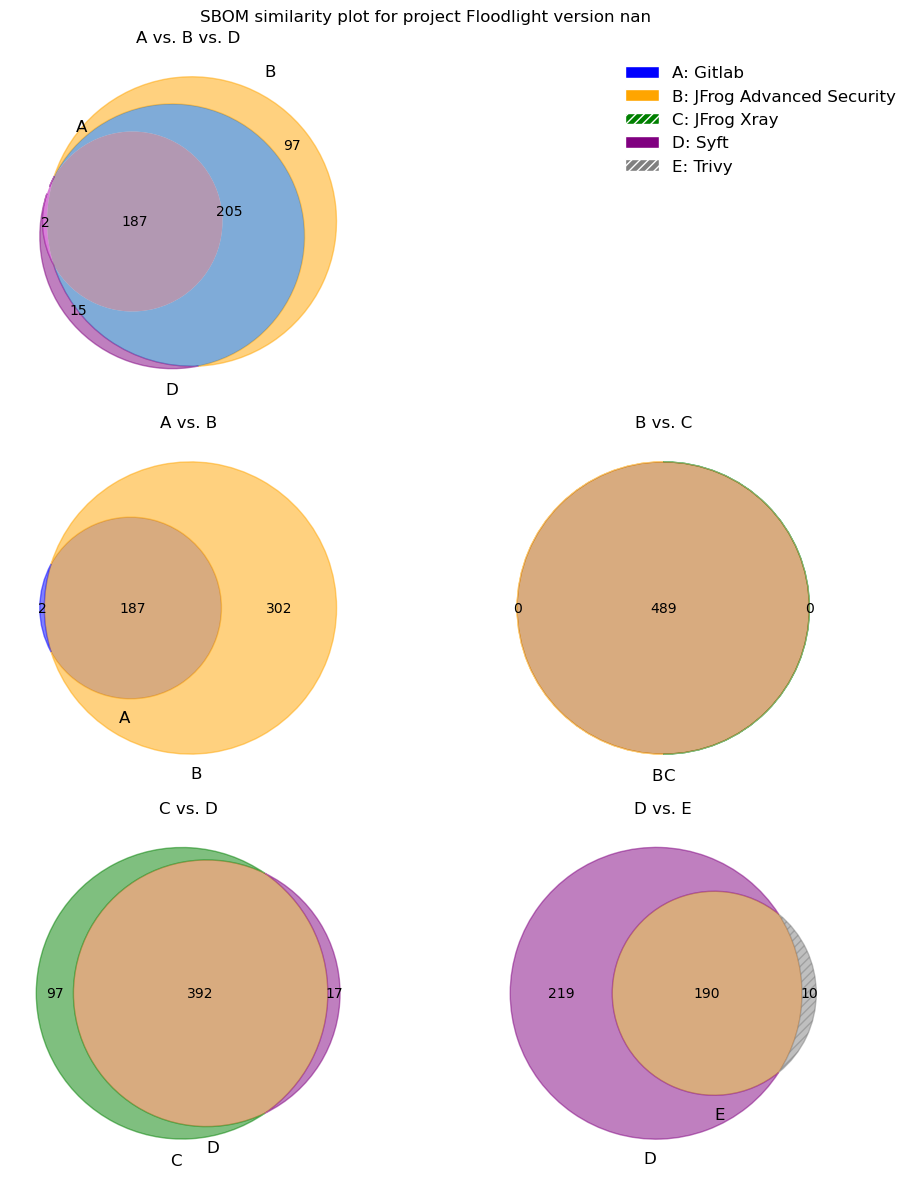

Evaluating data for confusion matrix of project: Generator_2 - None.


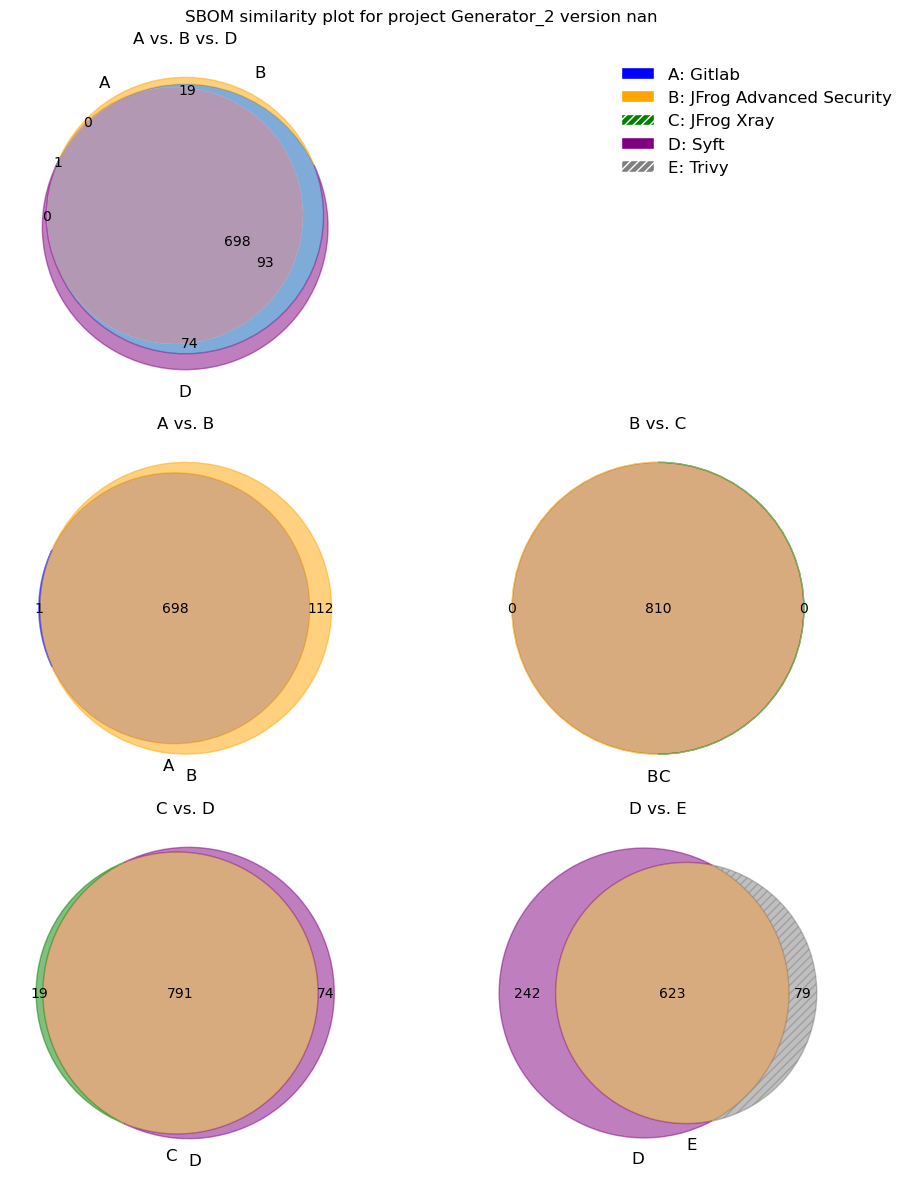

Evaluating data for confusion matrix of project: Juice_Shop - None.


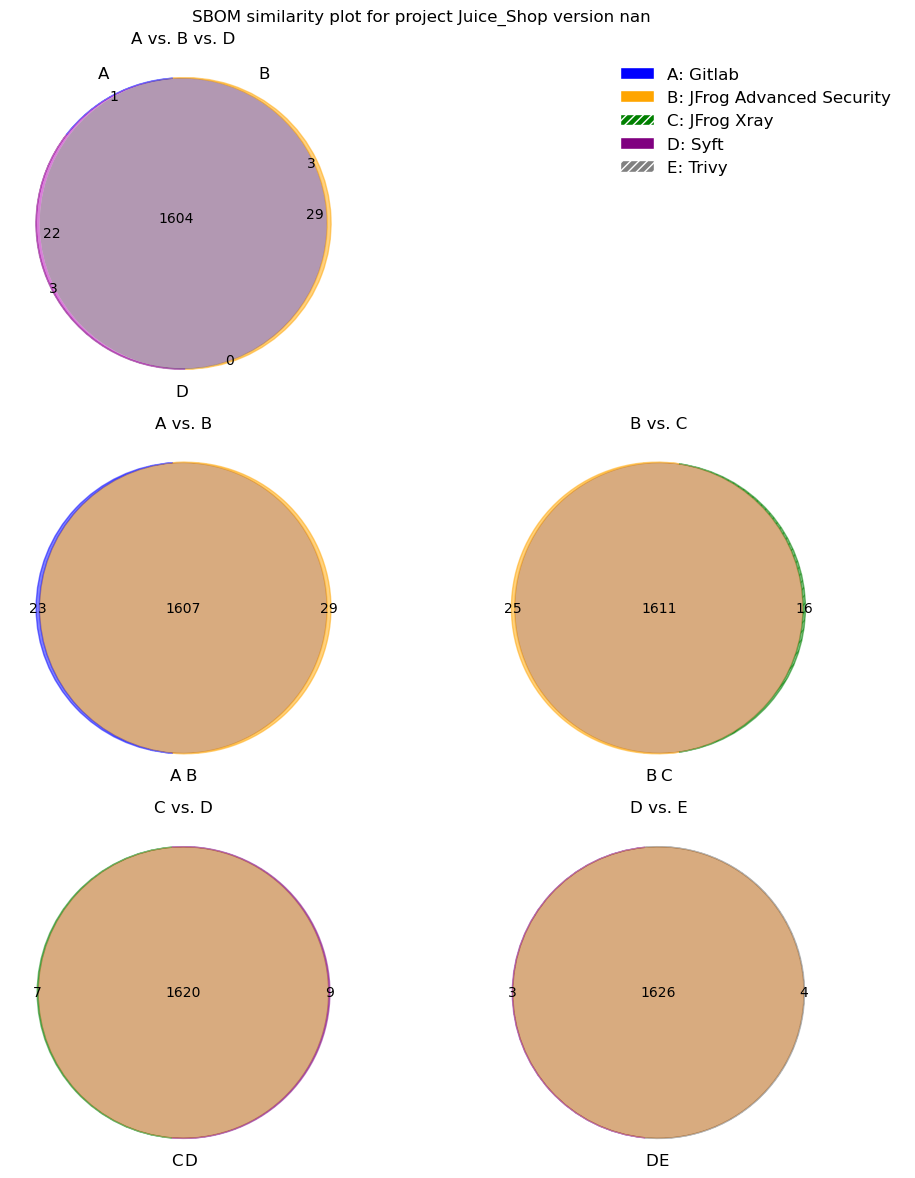

Evaluating data for confusion matrix of project: NMP - None.


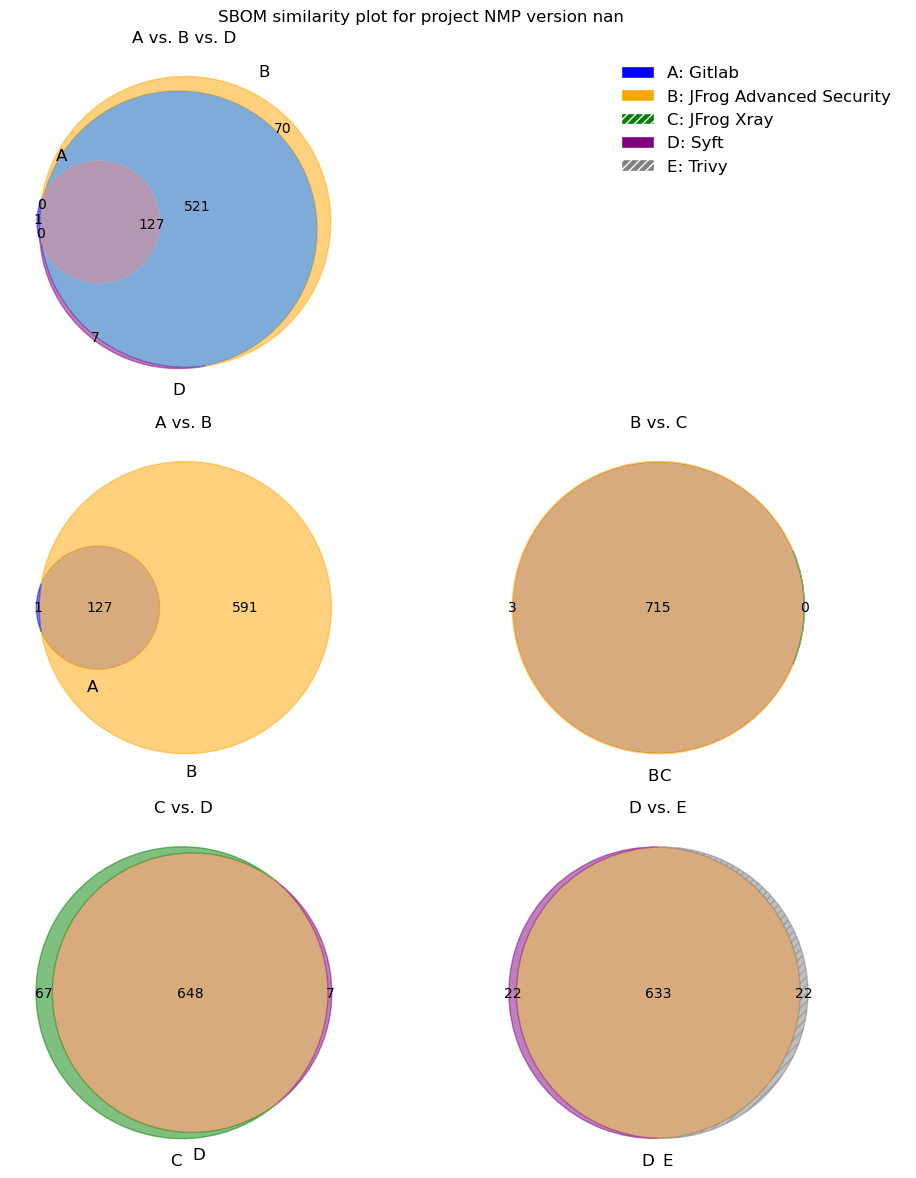

Evaluating data for confusion matrix of project: RDCS_RDCP-Client - None.


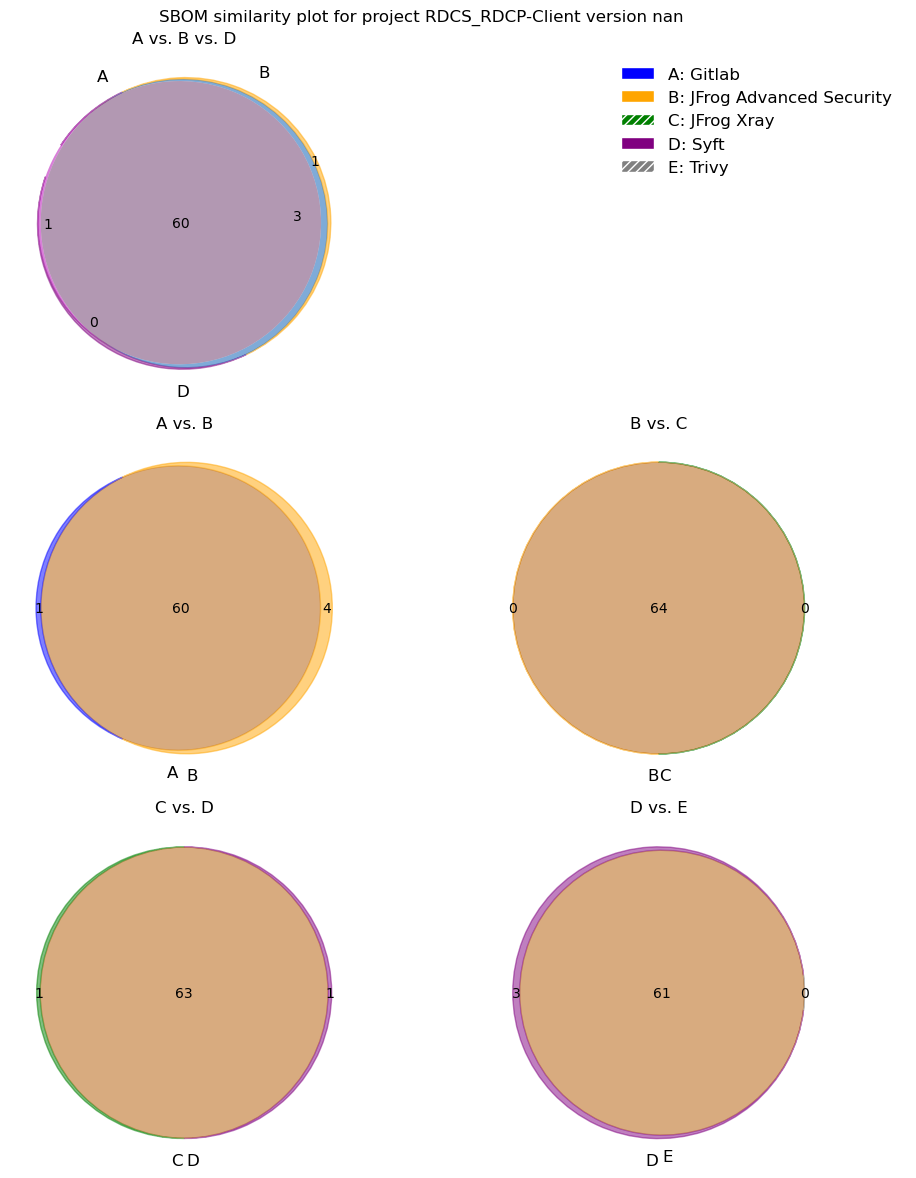

Evaluating data for confusion matrix of project: RT-Cosmo - None.


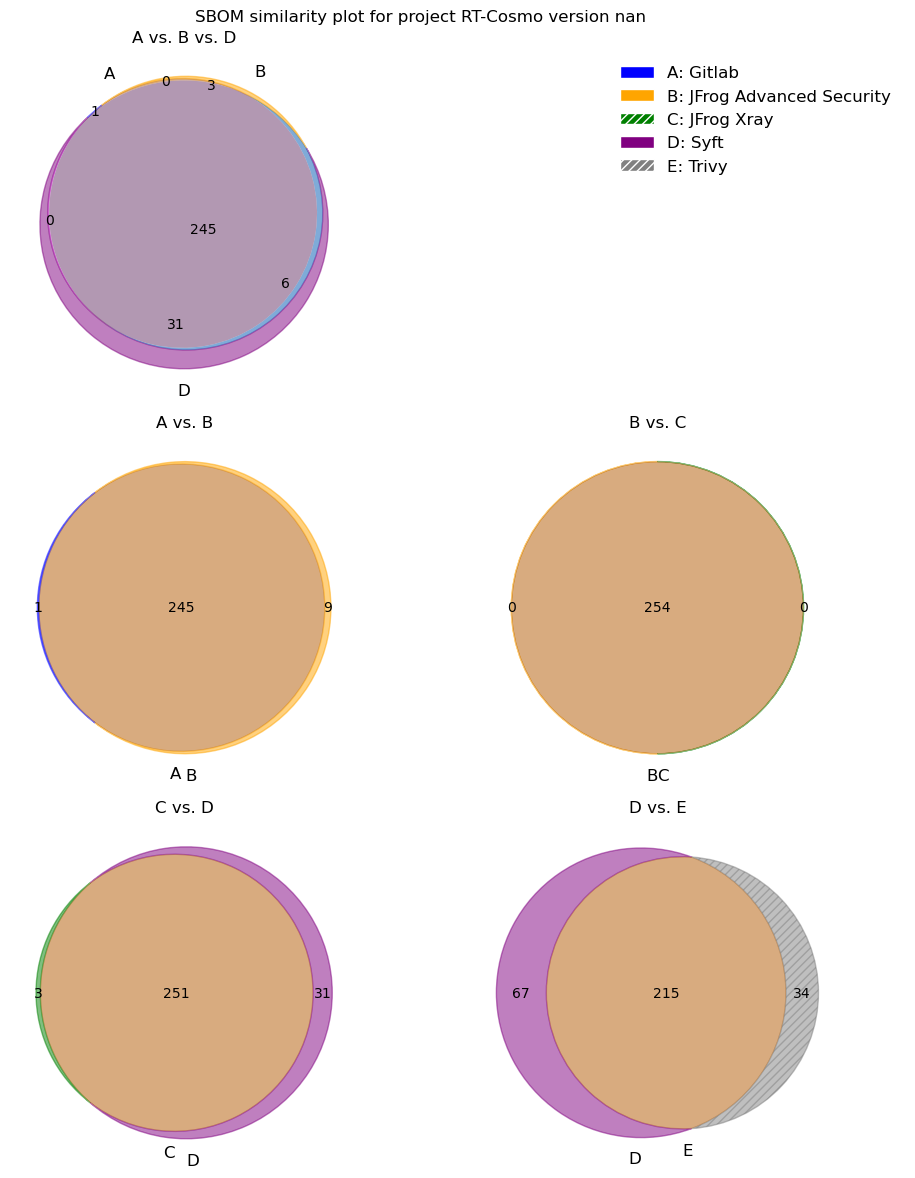

Evaluating data for confusion matrix of project: Vulnerable_Flask_App - 0.2.
debug: <class 'numpy.float64'>


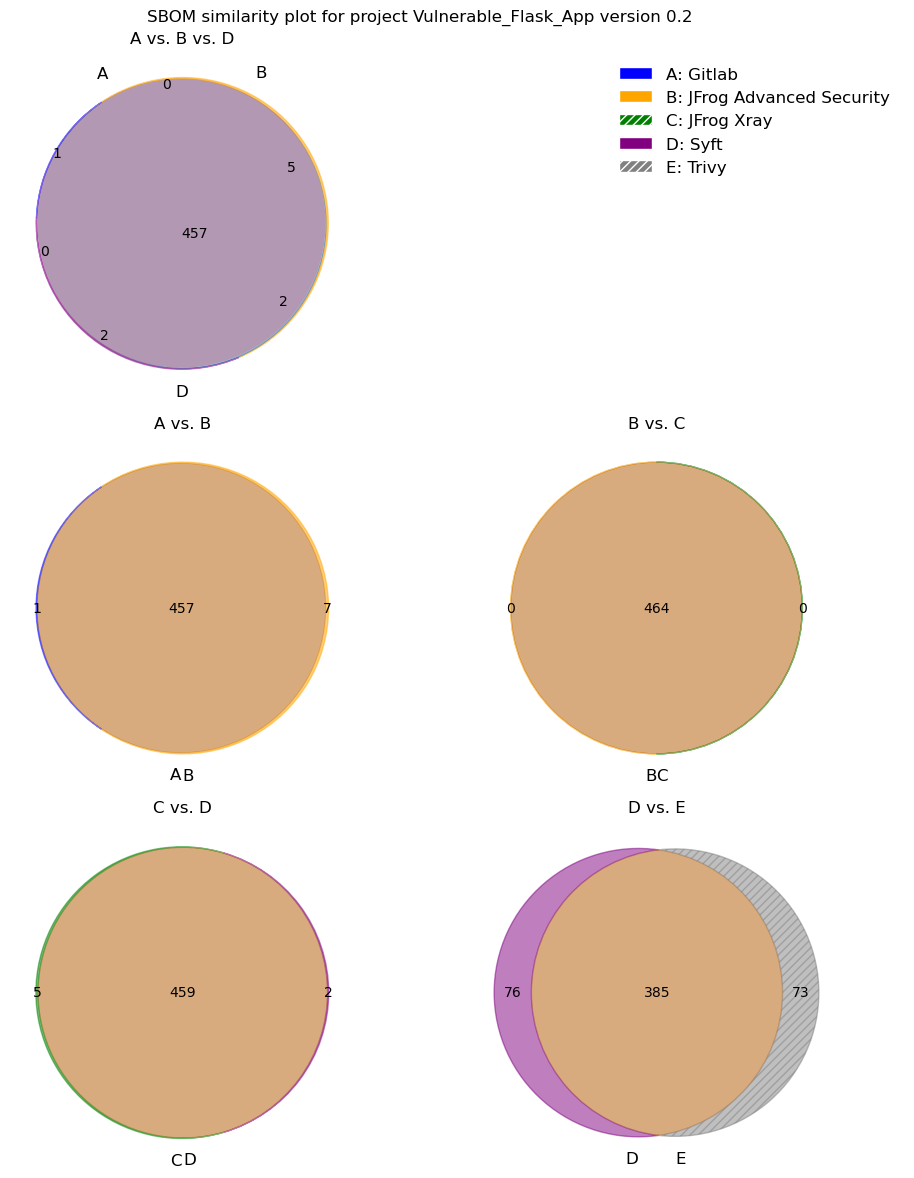

Evaluating data for confusion matrix of project: Vulnerable_Flask_App - 1.2.
debug: <class 'numpy.float64'>


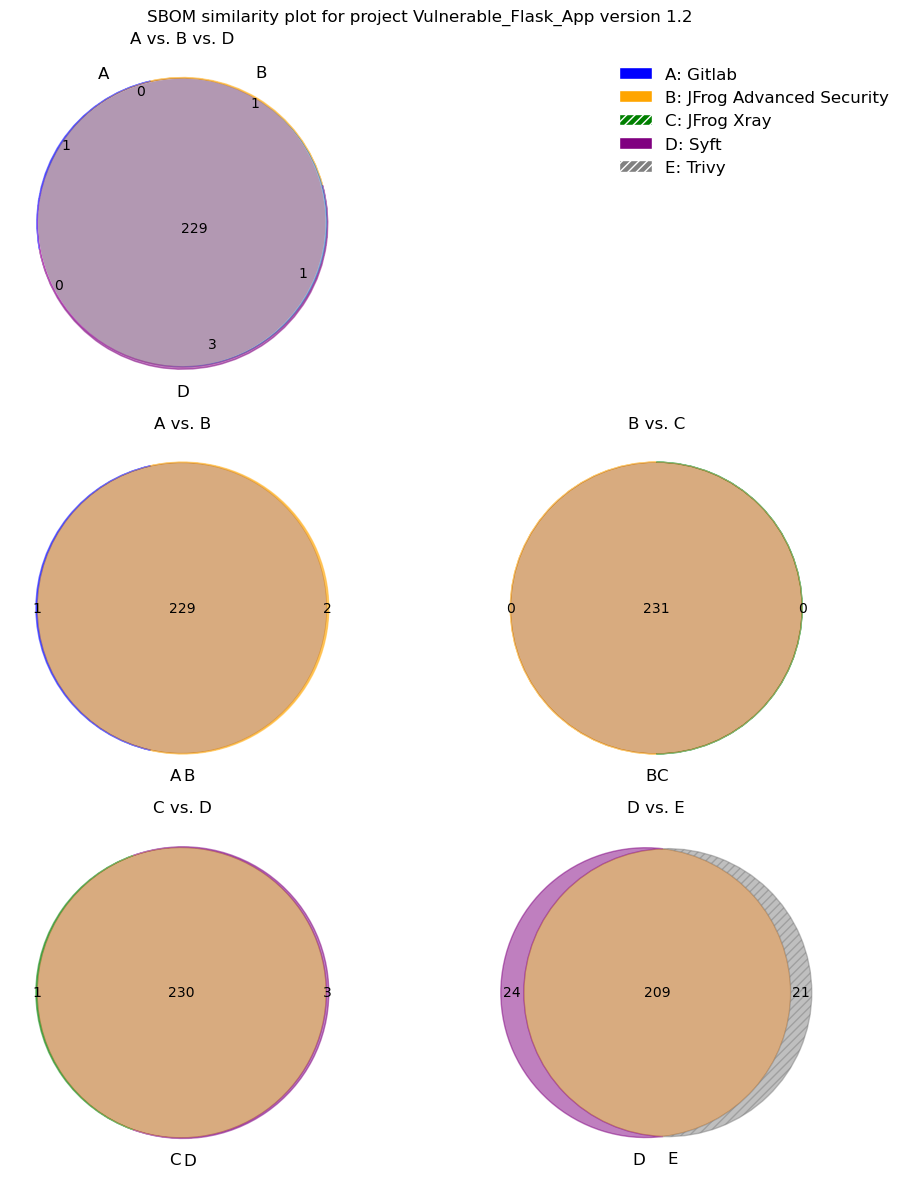

Evaluating data for confusion matrix of project: WebGoat - None.


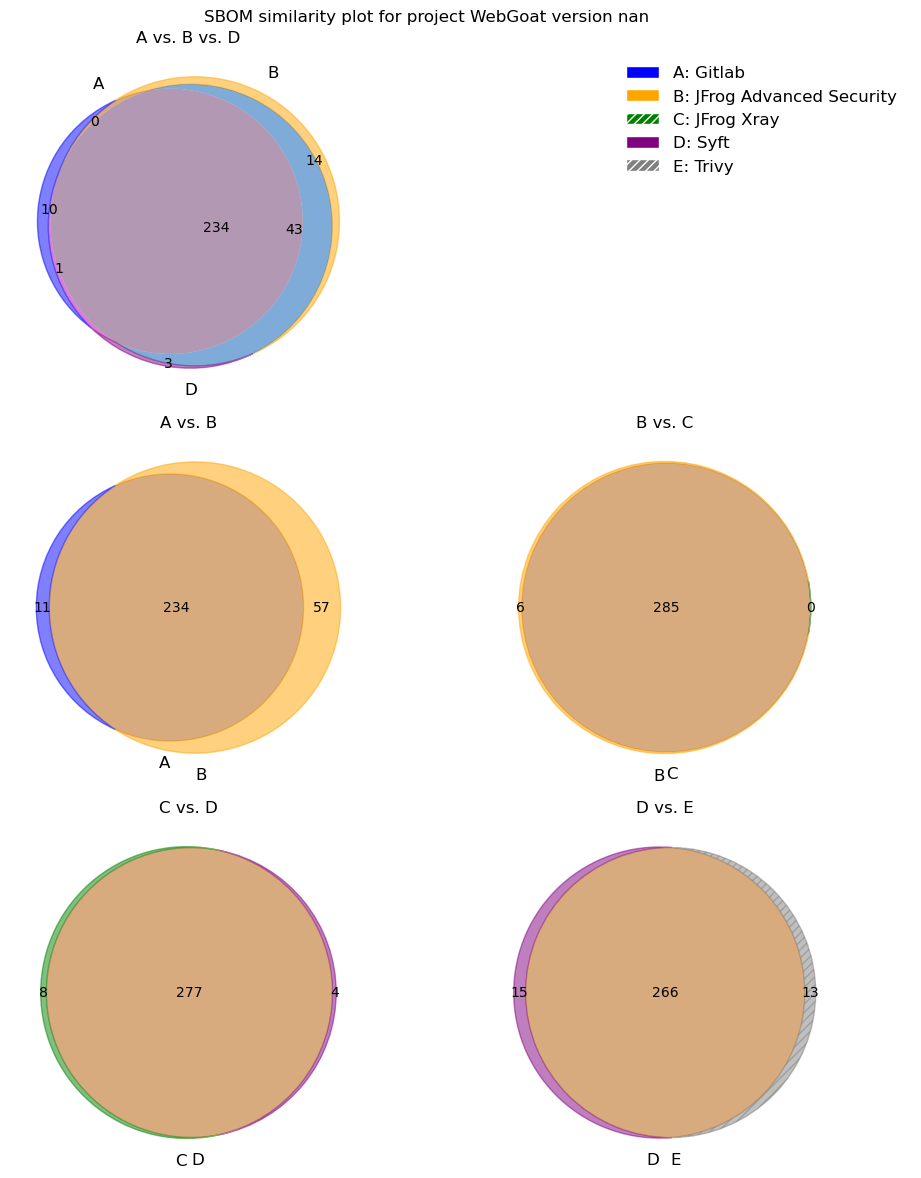

Evaluating data for confusion matrix of project: iEdgeMicroService - None.


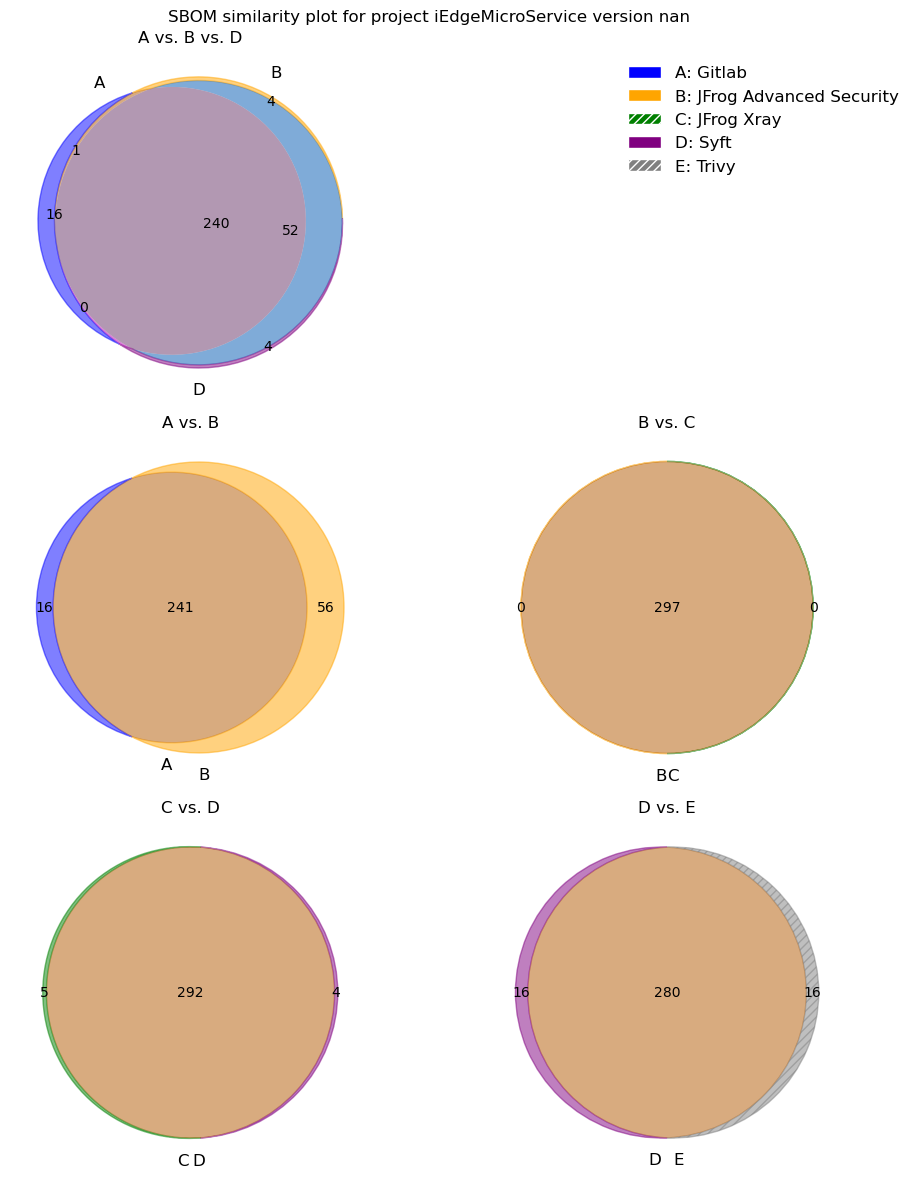

Evaluating data for confusion matrix of project: pm-dashboard-frontend - None.


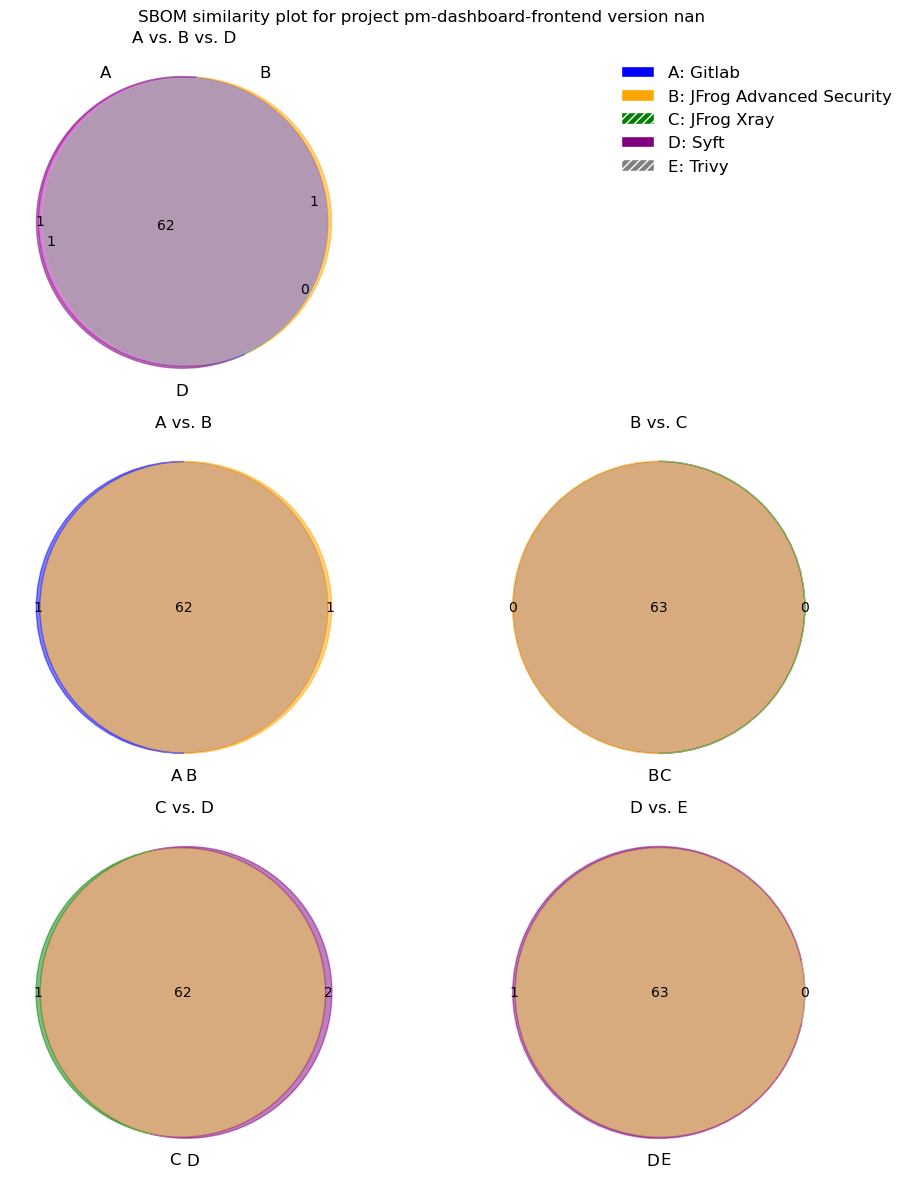

Evaluating data for confusion matrix of project: pm-lst-kpi-module - None.


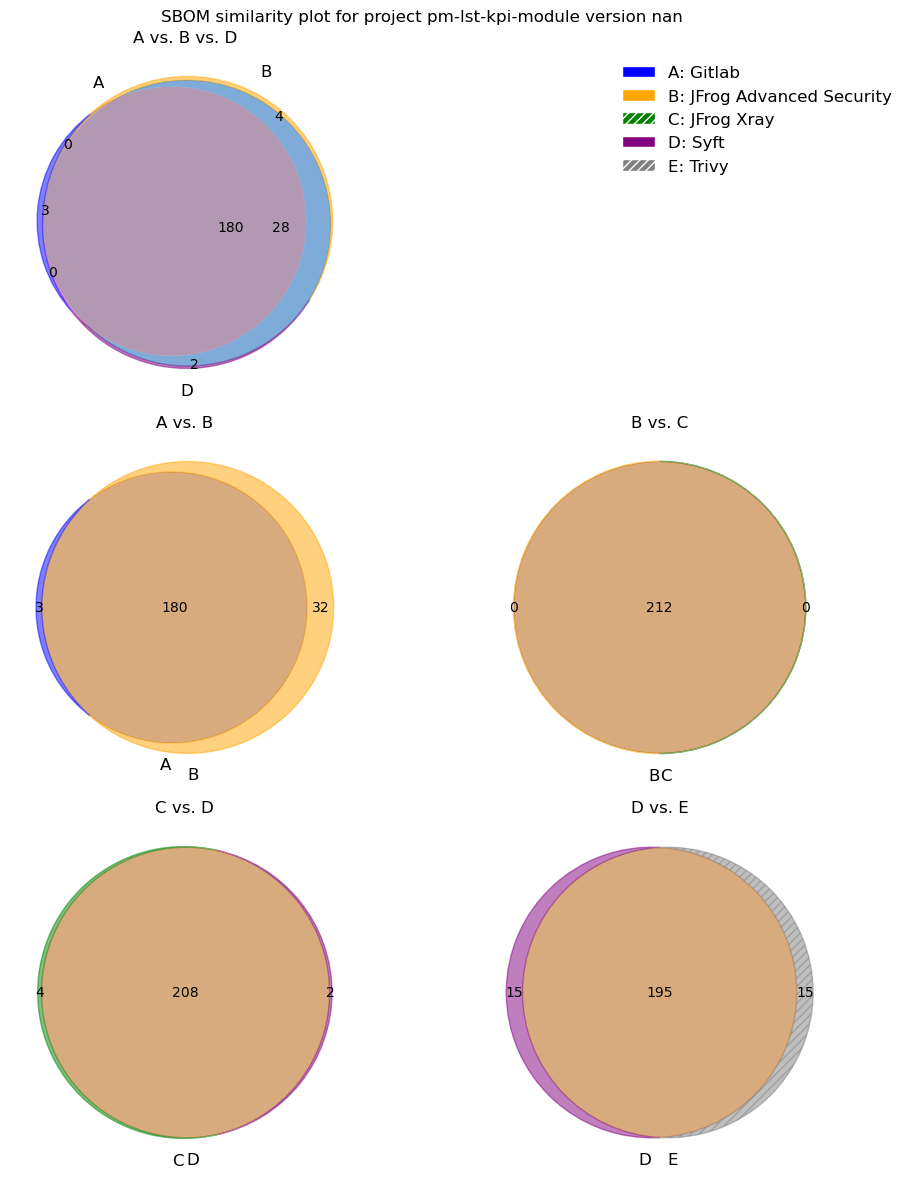

Evaluating data for confusion matrix of project: pm-mongo - None.


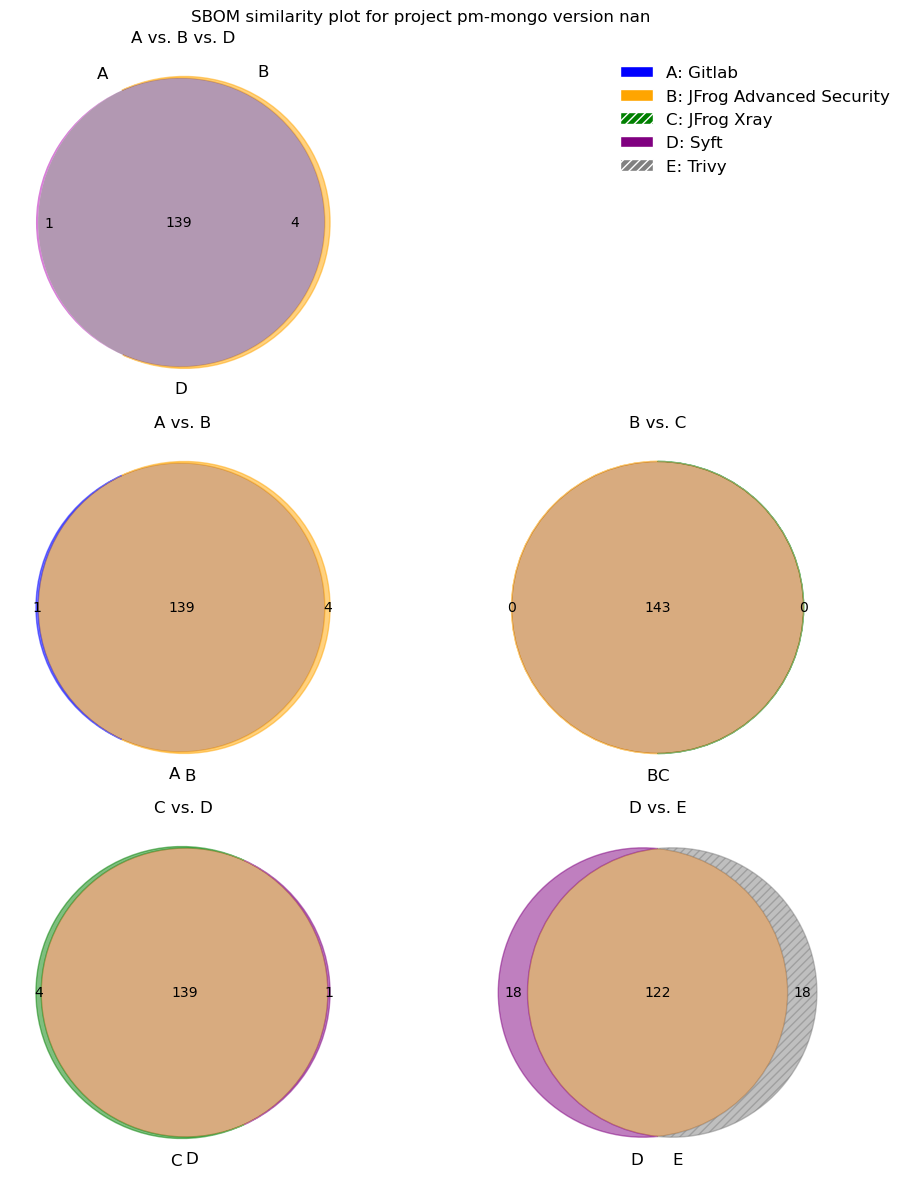

In [4]:
columns = ['project_name', 'project_version', 'scanner_name', 'name_version', 'name', 'version']
project_version_grouped = scanner_data_agg_df[columns].groupby(['project_name', 'project_version'], dropna=False)

for key, scanner_data_df in project_version_grouped:

    project_name, project_version = key  # Unpack the group key
    if pd.isna(project_version):
        project_version_str = 'None'
        target_output_file = f"SBOM_comparison_{project_name}.png"    
    else:
        project_version_str = str(project_version) 
        target_output_file = f"SBOM_comparison_{project_name}_{project_version}.png"
        
    print(f"Evaluating data for confusion matrix of project: {project_name} - {project_version_str}.")
    
    create_SBOM_similarity_plot(project_name, project_version, scanner_data_df, target_output_file)

#### Debug

In [5]:
scanner_data_agg_df.columns

Index(['scanner_name', 'name', 'version', 'purl', 'bom-ref', 'hashes',
       'hash_sum', 'hash_algo', 'p_type', 'p_namespace', 'p_name', 'p_version',
       'p_qualifiers', 'p_subpath', 'project_name', 'project_version',
       'project_name_version', 'name_version'],
      dtype='object')

### Visuailze SBOM data confusion matrix

Evaluating data for confusion matrix of project: Floodlight


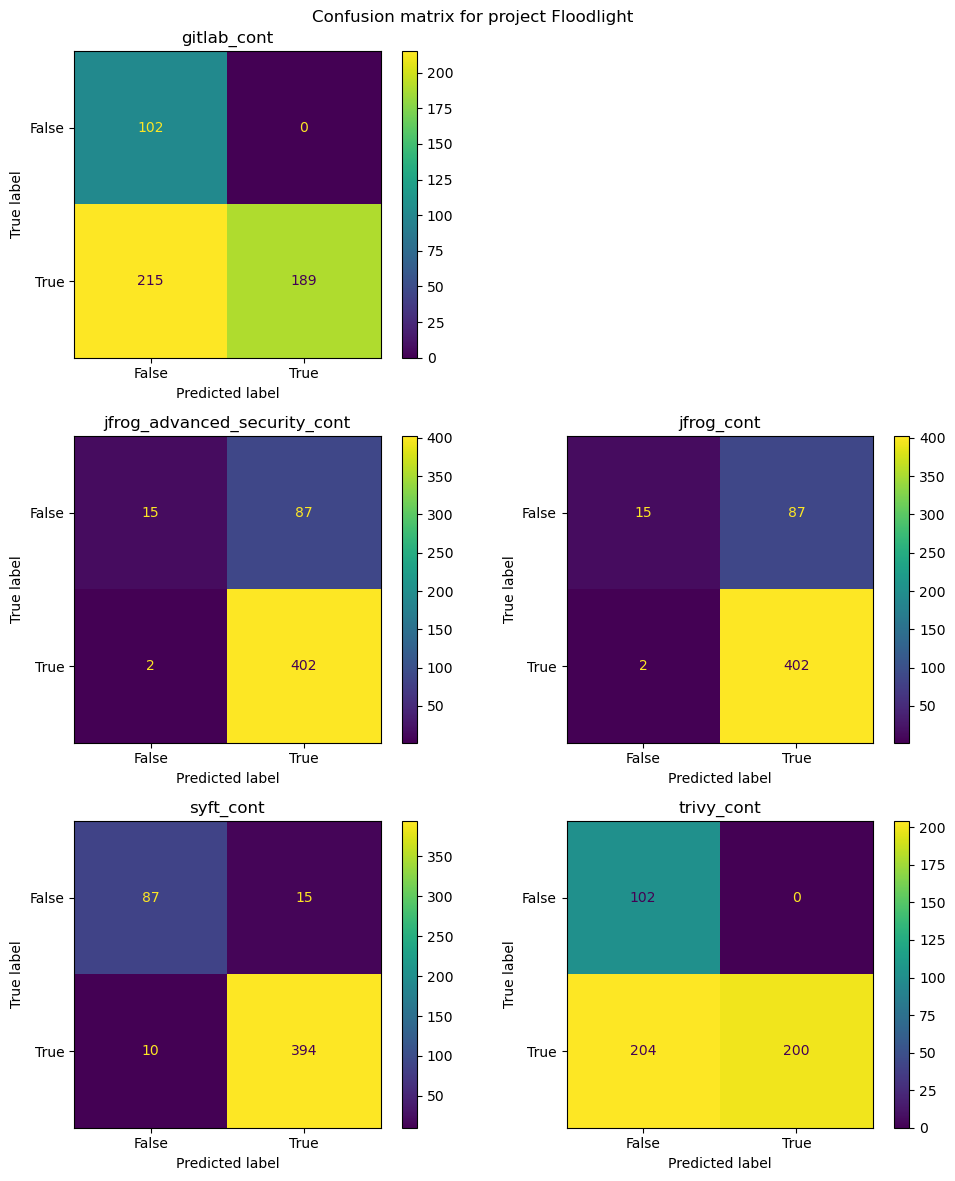

Evaluating data for confusion matrix of project: Generator_2


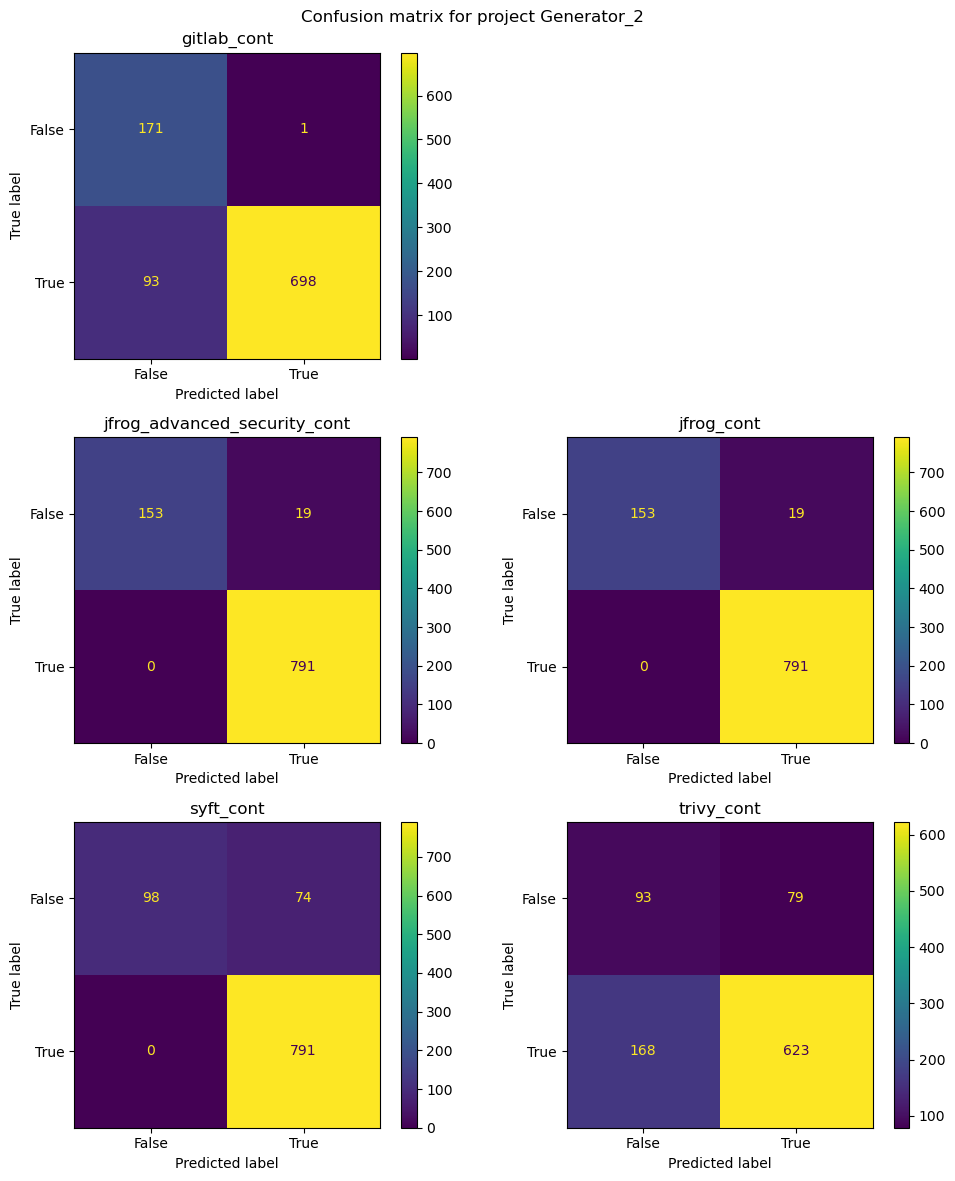

Evaluating data for confusion matrix of project: Juice_Shop


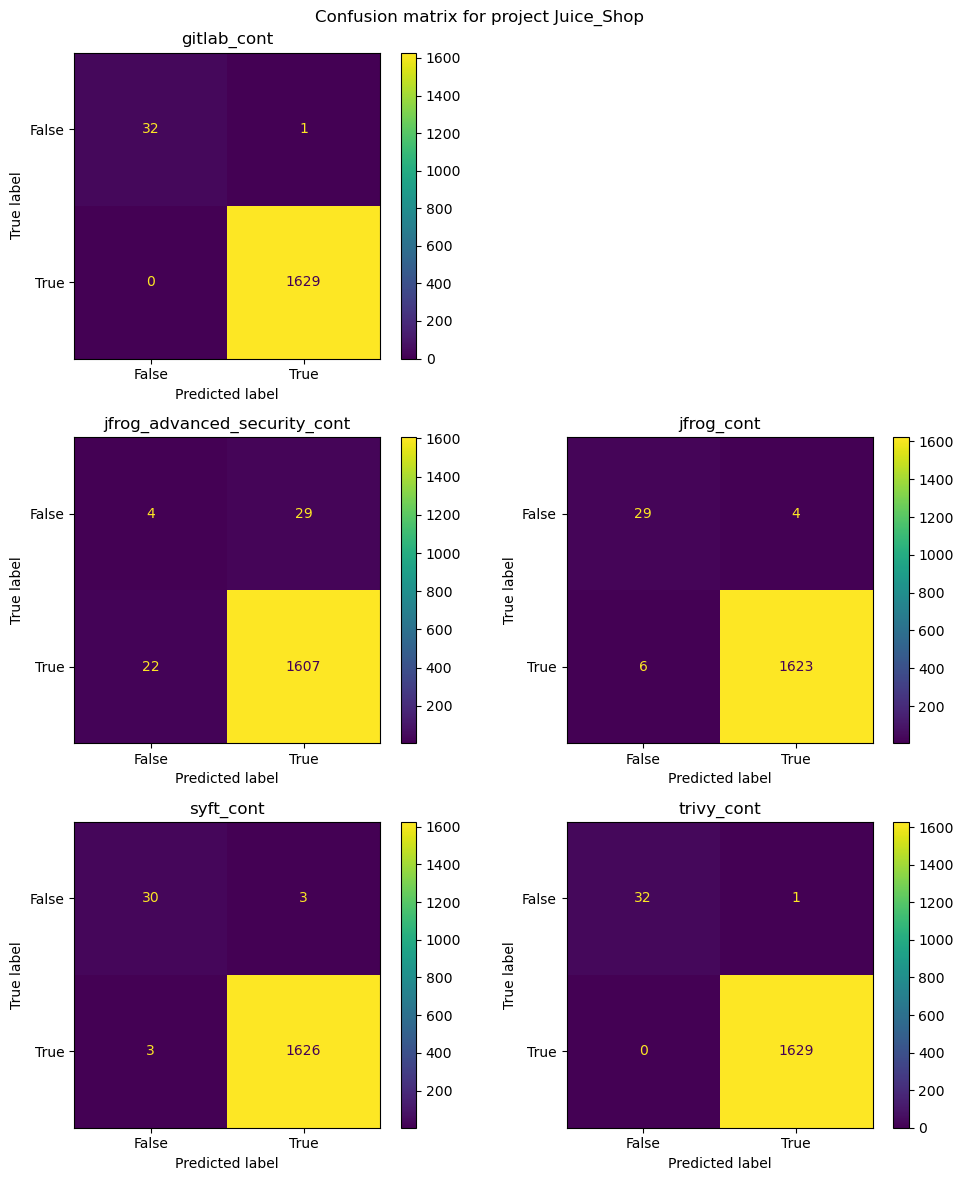

Evaluating data for confusion matrix of project: NMP


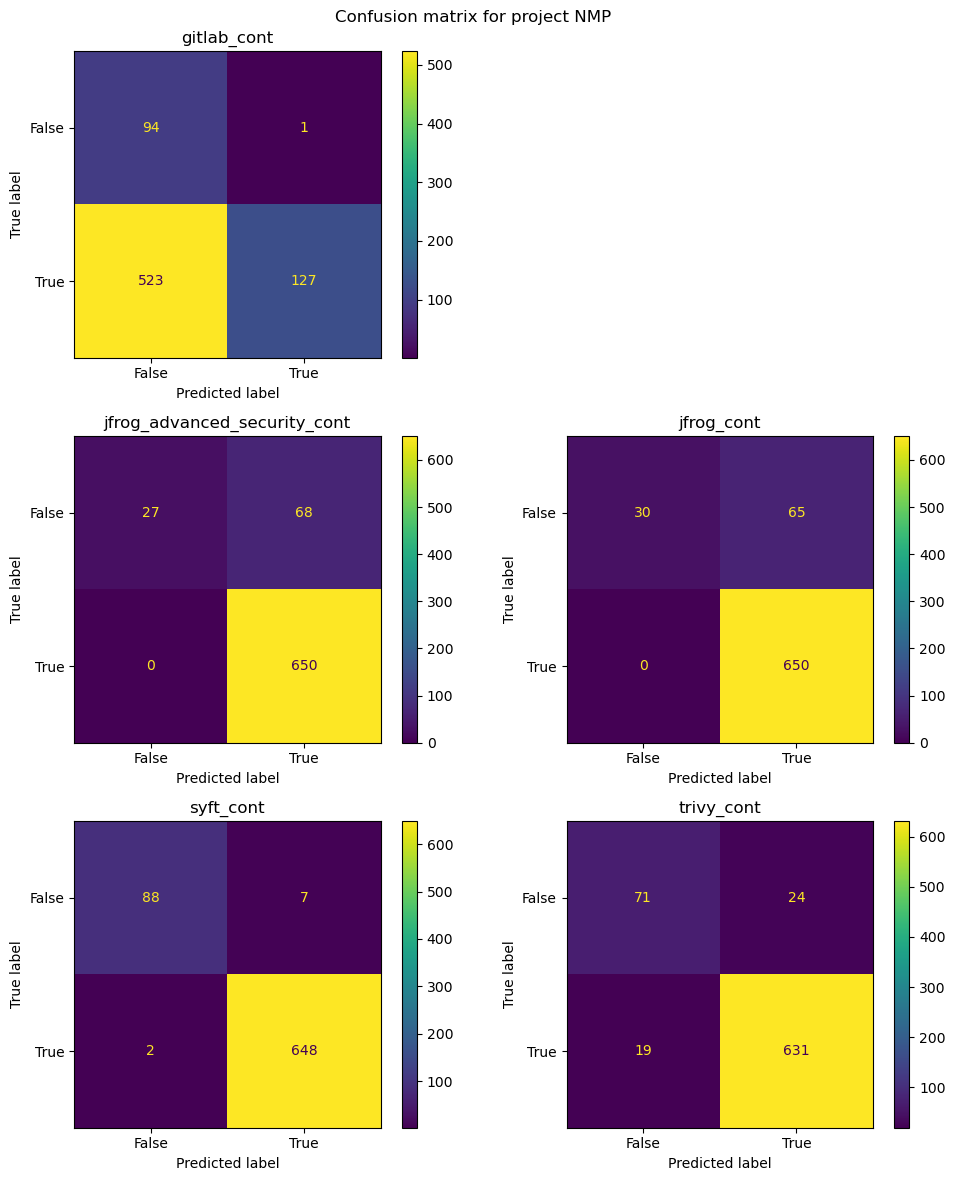

Evaluating data for confusion matrix of project: RDCS_RDCP-Client


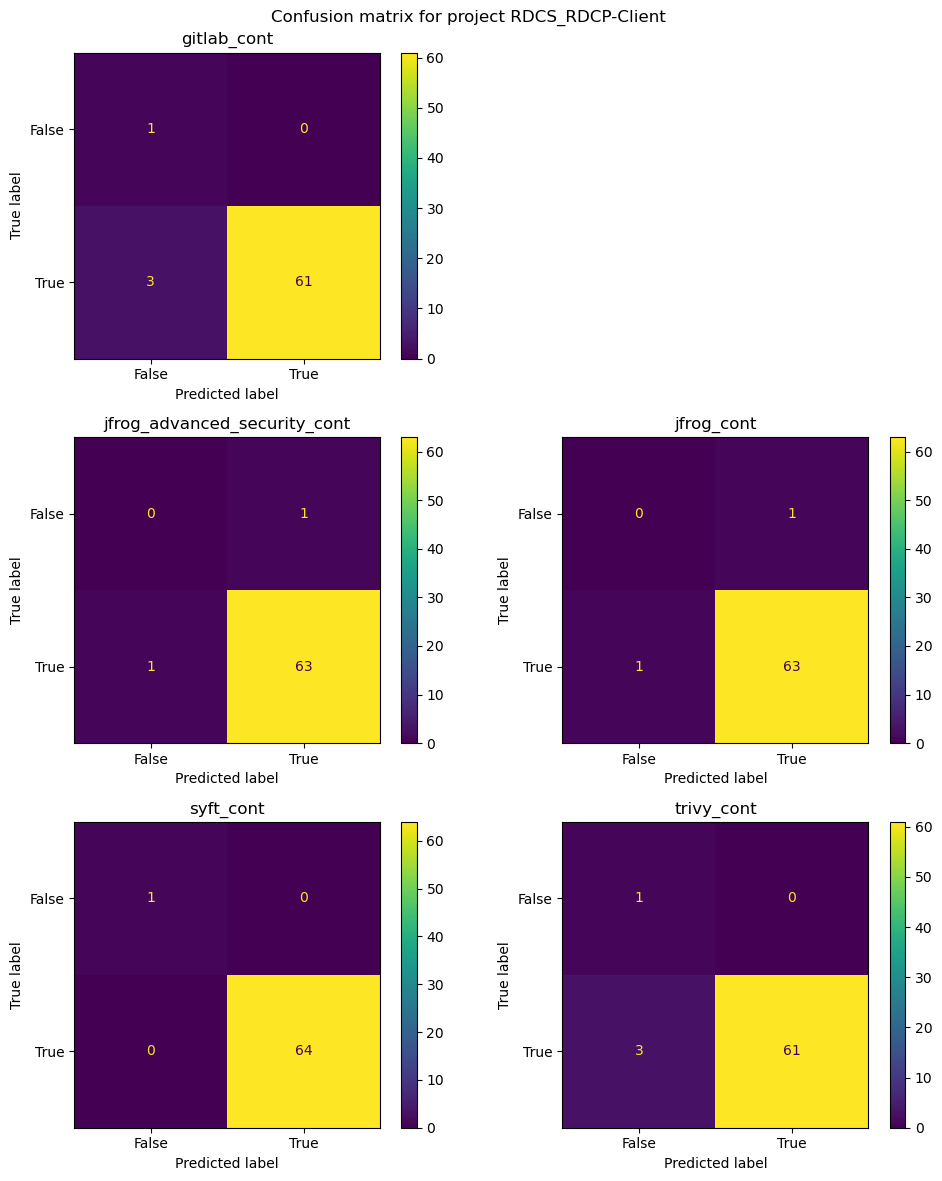

Evaluating data for confusion matrix of project: RT-Cosmo


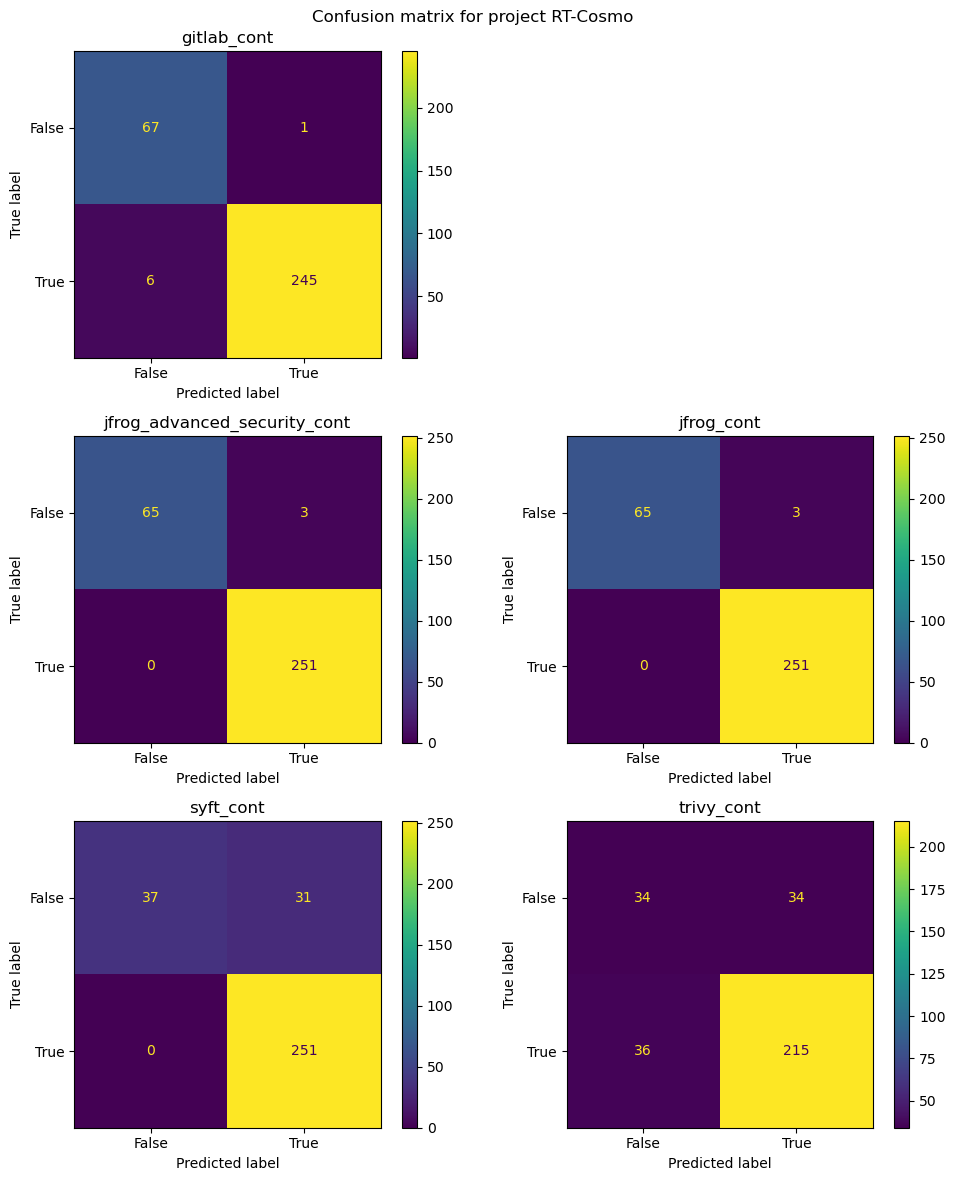

Evaluating data for confusion matrix of project: Vulnerable_Flask_App_0.2


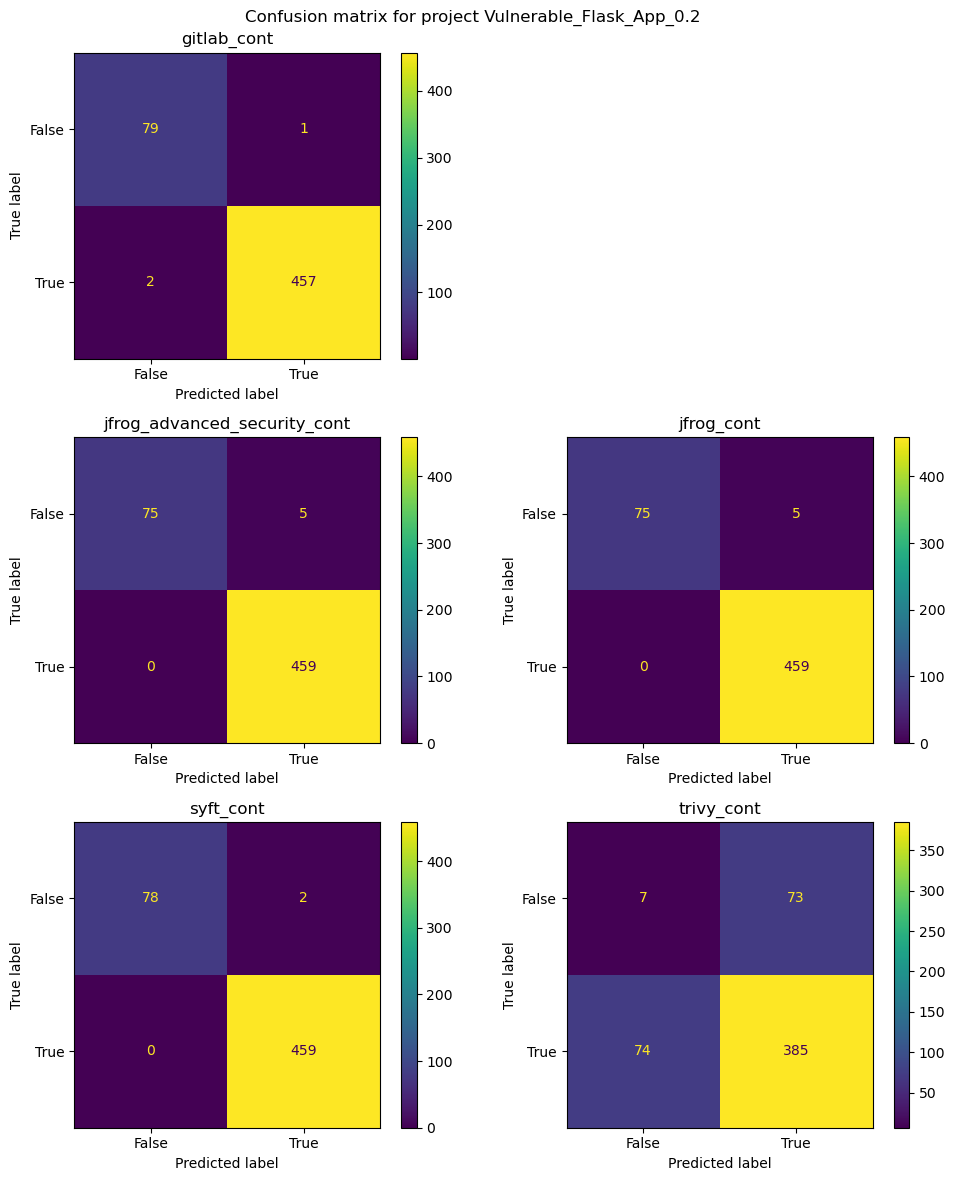

Evaluating data for confusion matrix of project: Vulnerable_Flask_App_1.2


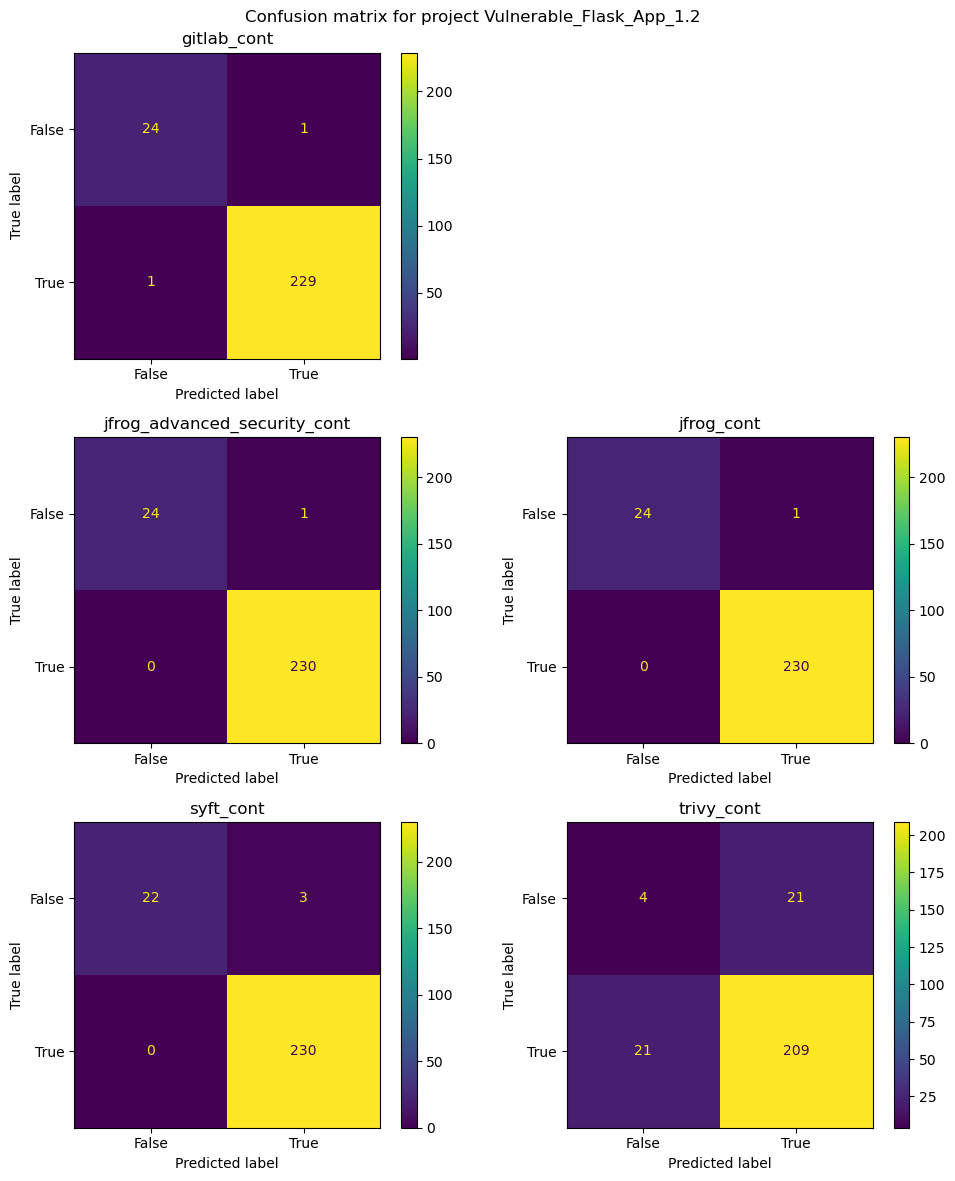

Evaluating data for confusion matrix of project: WebGoat


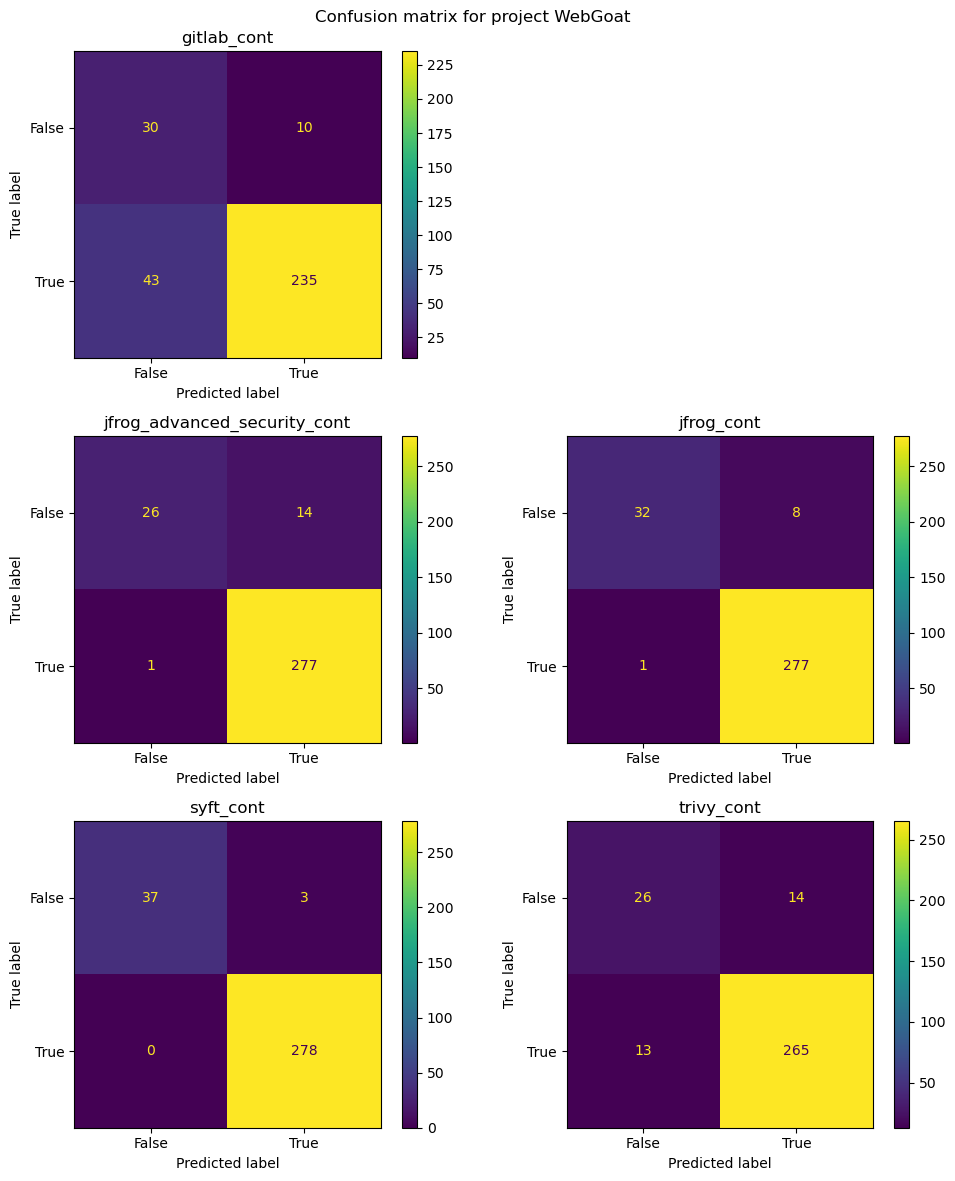

Evaluating data for confusion matrix of project: iEdgeMicroService


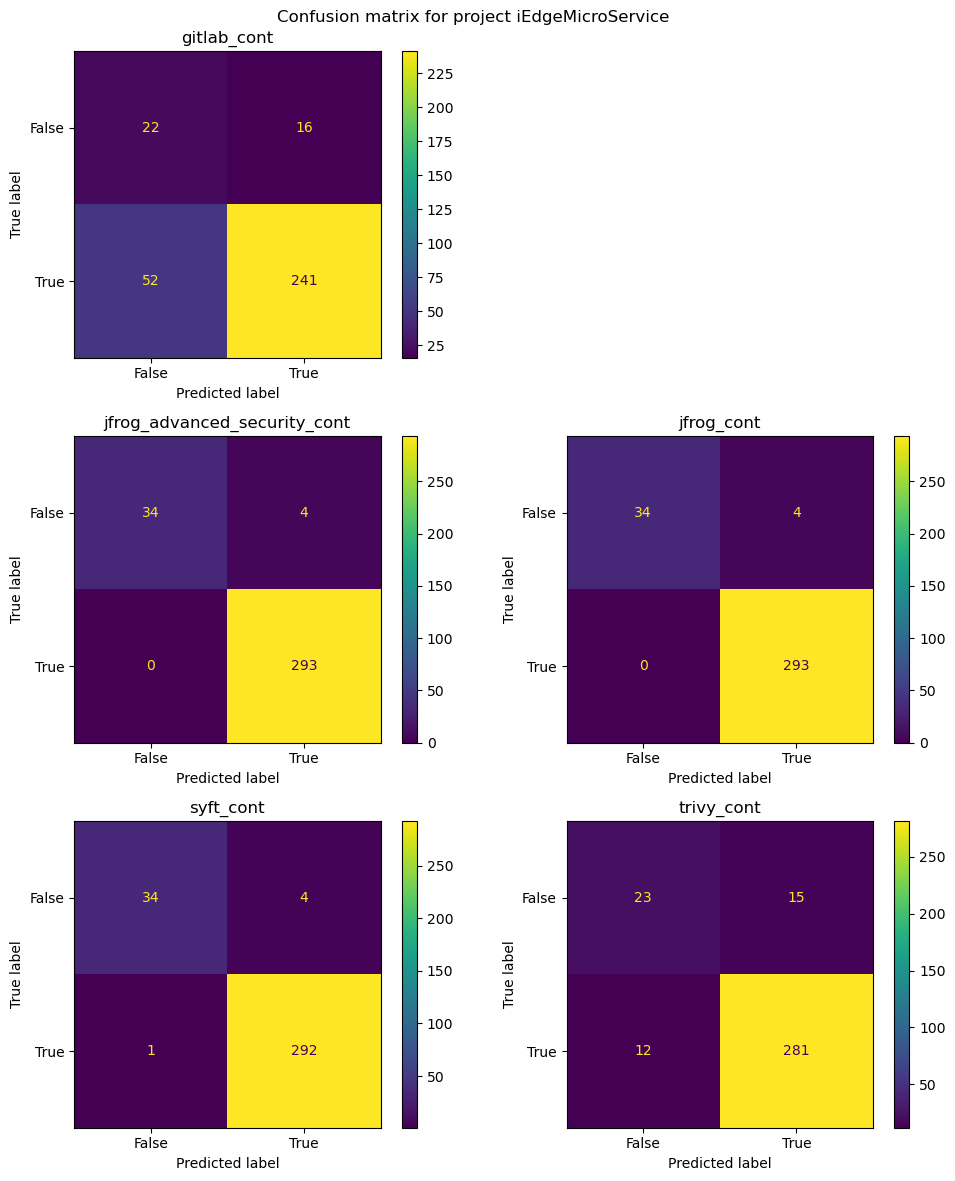

Evaluating data for confusion matrix of project: pm-dashboard-frontend


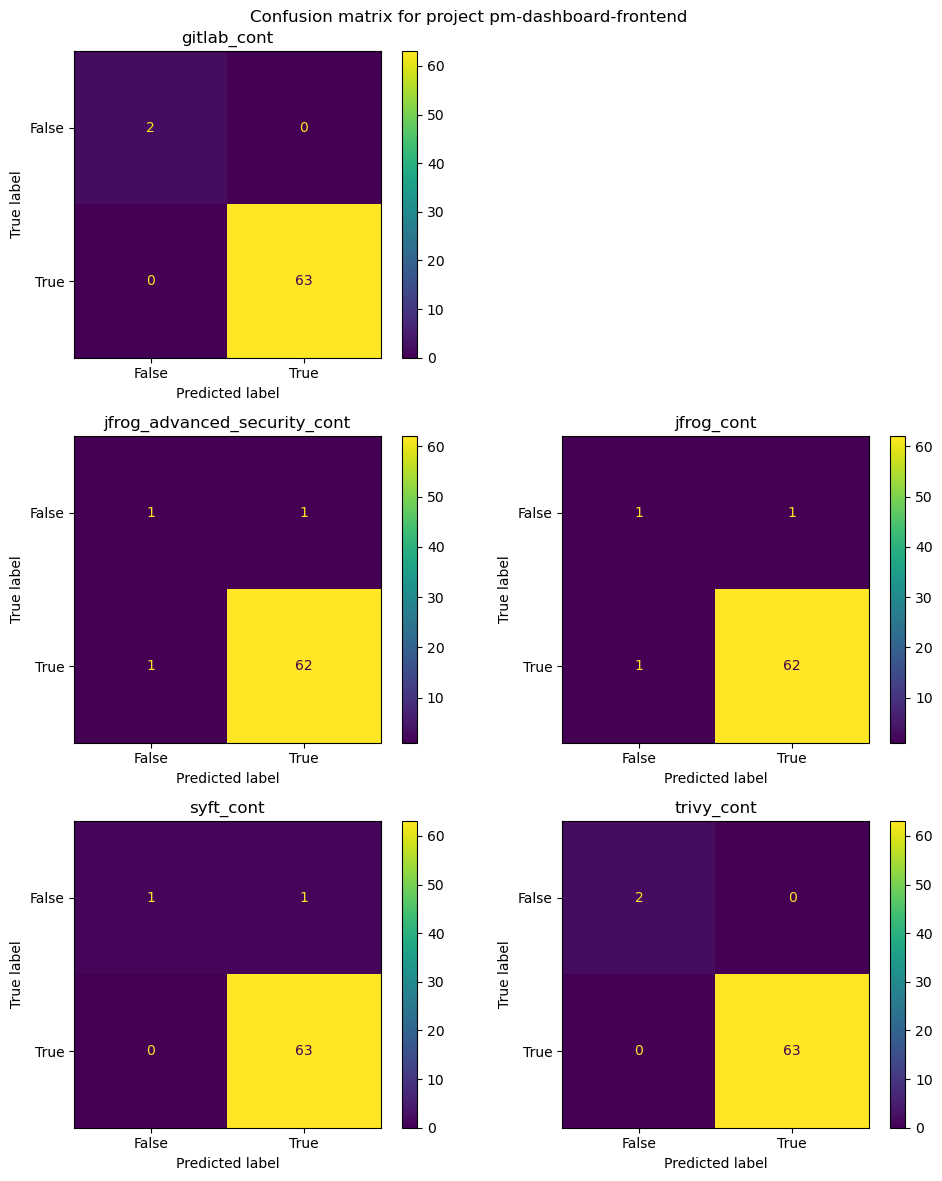

Evaluating data for confusion matrix of project: pm-lst-kpi-module


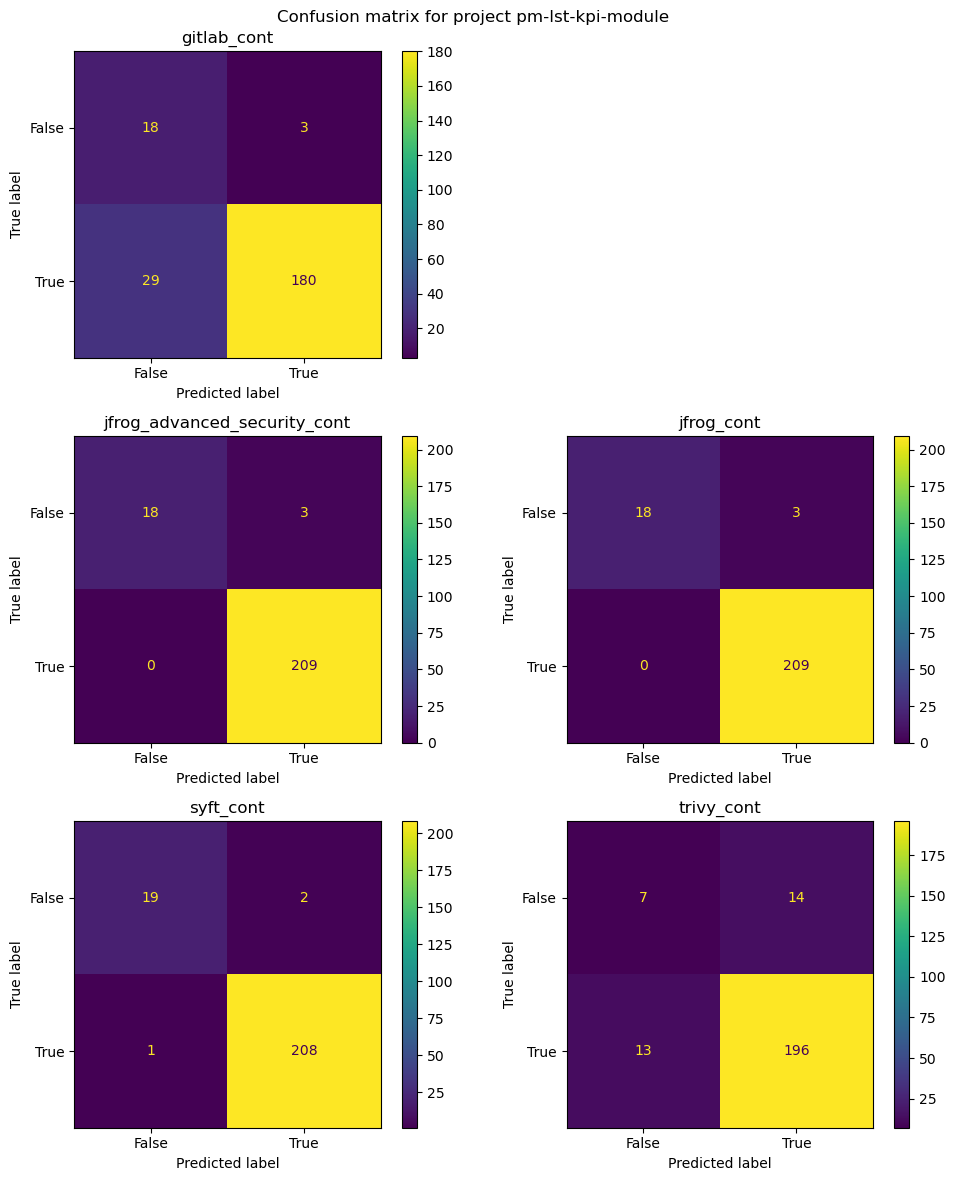

Evaluating data for confusion matrix of project: pm-mongo


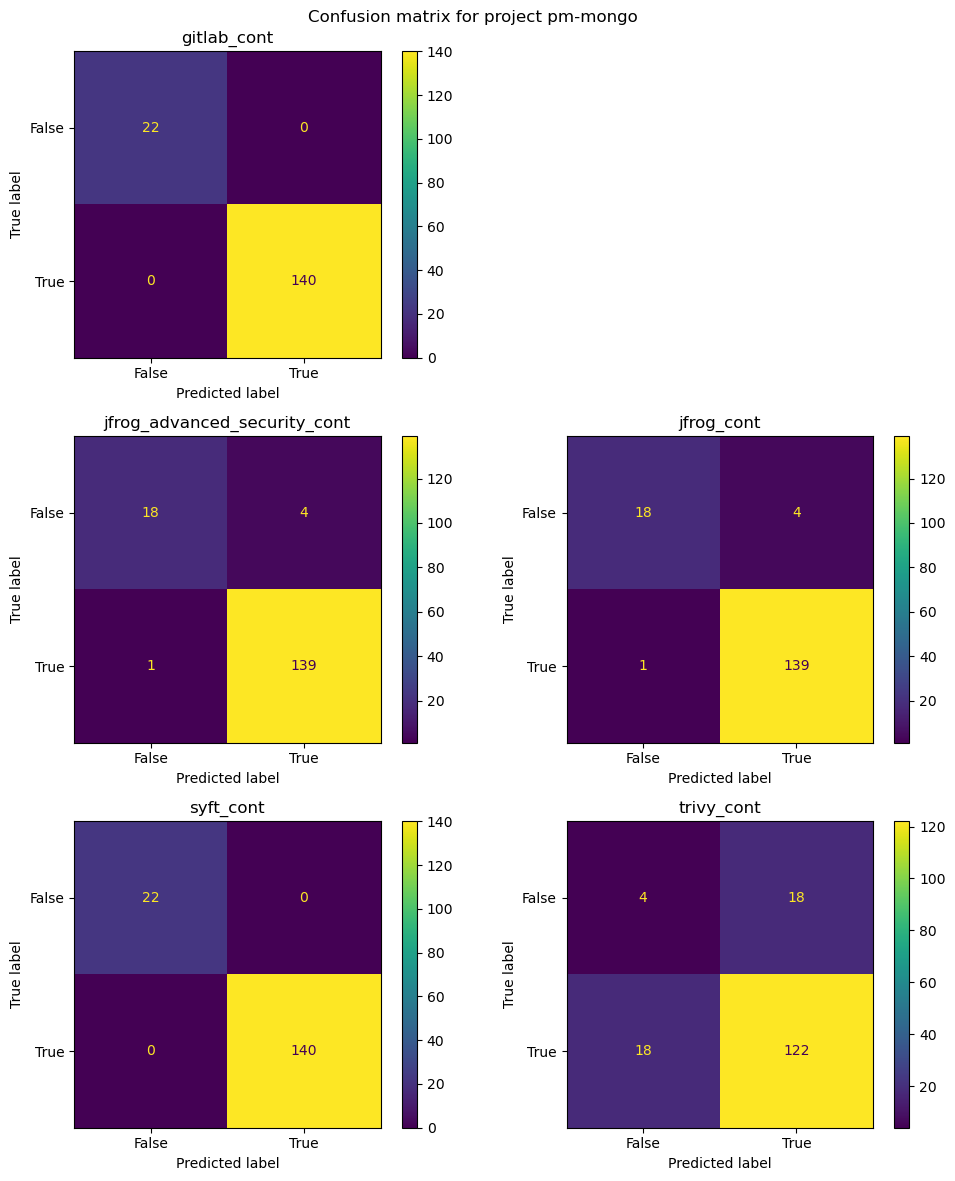

In [6]:
project_version_grouped = confusion_matrix_agg_df.groupby(['project_name_version'], dropna=False)

for project_name_version, scanner_data_df in project_version_grouped:
    
    print(f"Evaluating data for confusion matrix of project: {project_name_version[0]}")
     
    target_output_file = f"SBOM_confusion_matrix_{project_name_version[0]}.png"    
        
    # Create confusion matrix for every project
    create_SBOM_confusion_matrix(project_name_version[0], scanner_data_df, target_output_file)

#### Debug

## Data Analysis